In [1]:
# Final project file BCMB 420: Lam Vo
# Title: Comparitive proteomics of chemotatic Azosprillium brasilense mutants
# Date: 12/1/2018

#Introduction: 

#In a dynamic world, bacteria must be able to adapt to environmental changes; 
#one of such strategies is using chemotaxis to navigate. Chemotaxis is biased movements that 
#allow the bacterium to sense chemical gradient, move away from toxic substances, and move 
#toward beneficial substances. A. brasilense has multiple chemotaxis operons that encodes for 
#major histidine kinases and response regulators important for the chemotaxis pathway, 
#and their chemoreceptors and flagella motors are encoded in other part of the genome. 
#The mechanism at which the proteins encoded within the chemotaxis operon harbor chemoreceptors 
#is poorly understood. Here, we aim to look at how the presence, or lack thereof, of major histidine 
#kinases CheA affect the up- and down-regulation of diverse chemoreceptors as well as other non-chemotaxis 
#components in Azosprillum brasilense. Our lab was able to use mass spectrometry to probe protein 
#abundances within different backgrounds of A. brasilense (∆cheA4, ∆cheA1∆cheA4, and WT). 

#Aim: This project will do the following task
#1) Explore and visualize potential candidates extracted from proteomics data
#2) Look at simple statistics of different pairwaise comparision and perform Gene Set Enrichment Analysis using
# 
#3) Provide insights on differentially expressed proteins by looking at heatmaps, and machine-learning based analysis
# (dendrograms and manual clustering) + GO enrichment analysis
#4) Supplemental: Provide the replicability and distribution of proteomics data 
# (to determine appropiate test) of this study 

#All files and folder used in this project is in this path http://bioinfo.tk/user/lvo5/tree/clean%20project

In [2]:
#First, we want to load the previously cleaned data (not shown in this code) and look at the table to see
# What we are working with
#Given to us were three data files that represent proteins that were shown to have different means among three different
#mutants (ANOVA). The purpose of step was to shorten the data files for easier analysis.
import pandas as pd
data_1 = pd.read_csv('data_cleaned_A1A4toA1.csv', encoding= 'utf-8')
data_2 = pd.read_csv('data_cleaned_A1tosp7.csv', encoding= 'utf-8')
data_3 = pd.read_csv('data_cleaned_sp7toA4.csv', encoding= 'utf-8')

In [3]:
print('There are a total of ' + str(len(data_1)) + ' proteins in this file')
data_1[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4']].head(10)

There are a total of 341 proteins in this file


Accession                                      Gene function  \
0  A0A0P0FBD5                            Uncharacterized protein   
1  A0A0P0F6W5                            Uncharacterized protein   
2  A0A0N7I7H6                            Uncharacterized protein   
3  A0A0P0ENT2                            Uncharacterized protein   
4  A0A0P0EGU7                            Uncharacterized protein   
5  A0A0P0EEE0                ABC transporter ATP-binding protein   
6  A0A0P0FD78  Peptide ABC transporter substrate-binding protein   
7  A0A0P0EW12                                       DNA helicase   
8  A0A0P0F5R5                          Glutathione S-transferase   
9  A0A0P0ESU5                               Glutamine synthetase   

   Abundances (Normalized): F7: Sample, Bio Rep1, SP7  \
0                                       4.199953e+08    
1                                       1.155383e+07    
2                                       2.349336e+09    
3                                       1.385459e+08    
4                                       7.191629e+09    
5                                       8.494490e+07    
6                                       3.852770e+08    
7                                       2.759189e+09    
8                                       2.089823e+09    
9                                       2.841254e+09    

   Abundances (Normalized): F8: Sample, Bio Rep2, SP7  \
0                                       5.327991e+08    
1                                       6.643362e+06    
2                                       2.385109e+09    
3                                       2.930326e+08    
4                                       7.548888e+09    
5                                       9.383345e+07    
6                                       3.888840e+08    
7                                       2.906706e+09    
8                                       2.056875e+09    
9                                       2.744859e+09    

   Abundances (Normalized): F9: Sample, Bio Rep3, SP7  \
0                                       1.449827e+08    
1                                       1.302690e+07    
2                                       2.635075e+09    
3                                       3.267244e+08    
4                                       2.844535e+09    
5                                       1.428976e+08    
6                                       1.777021e+08    
7                                       2.672235e+09    
8                                       4.708423e+09    
9                                       2.522113e+09    

   Abundances (Normalized): F4: Sample, Bio Rep1, CheA4  \
0                                       6.119378e+07      
1                                       3.419722e+07      
2                                       6.572775e+08      
3                                       2.197483e+07      
4                                       2.296458e+08      
5                                       6.903622e+07      
6                                       6.003231e+08      
7                                       2.223019e+08      
8                                       6.559388e+08      
9                                       6.454734e+09      

   Abundances (Normalized): F5: Sample, Bio Rep2, CheA4  \
0                                       1.042649e+08      
1                                       3.787835e+07      
2                                       6.953822e+08      
3                                       2.720034e+07      
4                                       2.342704e+08      
5                                       1.447905e+08      
6                                       4.946053e+08      
7                                       2.533530e+08      
8                                       7.985197e+08      
9                                       5.862438e+09      

   Abundances (Normalized): F6: Sample, Bio Rep3, CheA4  \
0           

In [4]:
print('There are a total of ' + str(len(data_2)) + ' proteins in this file')
data_2[[' Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4']].head(10)

There are a total of 370 proteins in this file


Accession                              Gene function  \
0  A0A0P0ENY2                 Ornithine aminotransferase   
1  A0A0N7I8N5                           Histidine kinase   
2  A0A0P0E9Z9      MucR family transcriptional regulator   
3  A0A0N7I7G6                    Uncharacterized protein   
4  A0A0P0EV43  ABC transporter substrate-binding protein   
5  A0A0P0F692                             Ribonuclease T   
6  A0A0P0F985   Molybdenum storage protein subunit alpha   
7  A0A0P0EI40      Inosine-5-monophosphate dehydrogenase   
8  A0A0P0F6W5                    Uncharacterized protein   
9  A0A0P0E8S9          Chloramphenicol acetyltransferase   

   Abundances (Normalized): F7: Sample, Bio Rep1, SP7  \
0                                       3.907634e+09    
1                                       2.955413e+07    
2                                       7.435380e+09    
3                                       4.439956e+08    
4                                       2.089650e+07    
5                                       1.738698e+09    
6                                       6.430472e+08    
7                                       2.733759e+08    
8                                       1.155383e+07    
9                                       1.008437e+08    

   Abundances (Normalized): F8: Sample, Bio Rep2, SP7  \
0                                       3.291781e+09    
1                                       3.694021e+07    
2                                       7.345574e+09    
3                                       5.935830e+08    
4                                       2.475316e+07    
5                                       1.882498e+09    
6                                       7.011215e+08    
7                                       2.667047e+08    
8                                       6.643362e+06    
9                                       1.176875e+08    

   Abundances (Normalized): F9: Sample, Bio Rep3, SP7  \
0                                       2.474640e+09    
1                                       2.404245e+07    
2                                       6.765252e+09    
3                                       7.956973e+08    
4                                       1.960560e+07    
5                                       1.472154e+09    
6                                       6.530685e+08    
7                                       1.432355e+08    
8                                       1.302690e+07    
9                                       7.547519e+07    

   Abundances (Normalized): F4: Sample, Bio Rep1, CheA4  \
0                                       1.931028e+08      
1                                       5.366796e+06      
2                                       3.078429e+09      
3                                       1.801746e+08      
4                                       5.141539e+07      
5                                       7.153626e+08      
6                                       1.939126e+08      
7                                       1.772129e+07      
8                                       3.419722e+07      
9                                       2.174251e+07      

   Abundances (Normalized): F5: Sample, Bio Rep2, CheA4  \
0                                       1.679374e+08      
1                                       1.452093e+07      
2                                       3.192531e+09      
3                                       1.723748e+08      
4                                       5.696611e+07      
5                                       7.125859e+08      
6                                       1.931266e+08      
7                                       1.314774e+07      
8                                       3.787835e+07      
9                                       1.738811e+07      

   Abundances (Normalized): F6: Sample, Bio Rep3, CheA4  \
0                                       1.888862e+08      
1                                       5

In [5]:
#data_3
print('There are a total of ' + str(len(data_3)) + ' proteins in this file')
data_3[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4']].head(10)

There are a total of 371 proteins in this file


Accession                              Gene function  \
0  A0A0P0ENY2                 Ornithine aminotransferase   
1  A0A0N7I8N5                           Histidine kinase   
2  A0A0P0E9Z9      MucR family transcriptional regulator   
3  A0A0N7I7G6                    Uncharacterized protein   
4  A0A0P0EV43  ABC transporter substrate-binding protein   
5  A0A0P0F692                             Ribonuclease T   
6  A0A0P0F985   Molybdenum storage protein subunit alpha   
7  A0A0P0EI40      Inosine-5-monophosphate dehydrogenase   
8  A0A0P0F6W5                    Uncharacterized protein   
9  A0A0P0E8S9          Chloramphenicol acetyltransferase   

   Abundances (Normalized): F7: Sample, Bio Rep1, SP7  \
0                                       3.907634e+09    
1                                       2.955413e+07    
2                                       7.435380e+09    
3                                       4.439956e+08    
4                                       2.089650e+07    
5                                       1.738698e+09    
6                                       6.430472e+08    
7                                       2.733759e+08    
8                                       1.155383e+07    
9                                       1.008437e+08    

   Abundances (Normalized): F8: Sample, Bio Rep2, SP7  \
0                                       3.291781e+09    
1                                       3.694021e+07    
2                                       7.345574e+09    
3                                       5.935830e+08    
4                                       2.475316e+07    
5                                       1.882498e+09    
6                                       7.011215e+08    
7                                       2.667047e+08    
8                                       6.643362e+06    
9                                       1.176875e+08    

   Abundances (Normalized): F9: Sample, Bio Rep3, SP7  \
0                                       2.474640e+09    
1                                       2.404245e+07    
2                                       6.765252e+09    
3                                       7.956973e+08    
4                                       1.960560e+07    
5                                       1.472154e+09    
6                                       6.530685e+08    
7                                       1.432355e+08    
8                                       1.302690e+07    
9                                       7.547519e+07    

   Abundances (Normalized): F4: Sample, Bio Rep1, CheA4  \
0                                       1.931028e+08      
1                                       5.366796e+06      
2                                       3.078429e+09      
3                                       1.801746e+08      
4                                       5.141539e+07      
5                                       7.153626e+08      
6                                       1.939126e+08      
7                                       1.772129e+07      
8                                       3.419722e+07      
9                                       2.174251e+07      

   Abundances (Normalized): F5: Sample, Bio Rep2, CheA4  \
0                                       1.679374e+08      
1                                       1.452093e+07      
2                                       3.192531e+09      
3                                       1.723748e+08      
4                                       5.696611e+07      
5                                       7.125859e+08      
6                                       1.931266e+08      
7                                       1.314774e+07      
8                                       3.787835e+07      
9                                       1.738811e+07      

   Abundances (Normalized): F6: Sample, Bio Rep3, CheA4  \
0                                       1.888862e+08      
1                                       5

In [6]:
# Analysis 1: get, explore, and visualize differentially expressed proteins

#Now that we have imported all of the data into the workspace, we want to merge these data together for easier analysis
# The goal of the merging to data is to not have any duplicates.

data_2.rename(columns={' Accession':'Accession'}, inplace=True)

merged_1 = pd.concat([data_1, data_2])
merged_2 = pd.concat([merged_1, data_3])
merged_3 = merged_2.drop_duplicates(subset='Accession',keep='first')
merged_3 =merged_3[merged_3.Accession != 'Q862S4'] #remove cow protein index 347
merged_3 = merged_3[list(merged_3.columns[1:21])]


data_cleaned = merged_3
data_cleaned.to_excel('A4anddoublevssp7_rawmsdata.xlsx')

In [7]:
print('There are a total of ' + str(len(data_cleaned)) + ' proteins in the master file')
data_cleaned[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4']].head(10)

There are a total of 533 proteins in the master file


Accession                                      Gene function  \
0  A0A0P0FBD5                            Uncharacterized protein   
1  A0A0P0F6W5                            Uncharacterized protein   
2  A0A0N7I7H6                            Uncharacterized protein   
3  A0A0P0ENT2                            Uncharacterized protein   
4  A0A0P0EGU7                            Uncharacterized protein   
5  A0A0P0EEE0                ABC transporter ATP-binding protein   
6  A0A0P0FD78  Peptide ABC transporter substrate-binding protein   
7  A0A0P0EW12                                       DNA helicase   
8  A0A0P0F5R5                          Glutathione S-transferase   
9  A0A0P0ESU5                               Glutamine synthetase   

   Abundances (Normalized): F7: Sample, Bio Rep1, SP7  \
0                                       4.199953e+08    
1                                       1.155383e+07    
2                                       2.349336e+09    
3                                       1.385459e+08    
4                                       7.191629e+09    
5                                       8.494490e+07    
6                                       3.852770e+08    
7                                       2.759189e+09    
8                                       2.089823e+09    
9                                       2.841254e+09    

   Abundances (Normalized): F8: Sample, Bio Rep2, SP7  \
0                                       5.327991e+08    
1                                       6.643362e+06    
2                                       2.385109e+09    
3                                       2.930326e+08    
4                                       7.548888e+09    
5                                       9.383345e+07    
6                                       3.888840e+08    
7                                       2.906706e+09    
8                                       2.056875e+09    
9                                       2.744859e+09    

   Abundances (Normalized): F9: Sample, Bio Rep3, SP7  \
0                                       1.449827e+08    
1                                       1.302690e+07    
2                                       2.635075e+09    
3                                       3.267244e+08    
4                                       2.844535e+09    
5                                       1.428976e+08    
6                                       1.777021e+08    
7                                       2.672235e+09    
8                                       4.708423e+09    
9                                       2.522113e+09    

   Abundances (Normalized): F4: Sample, Bio Rep1, CheA4  \
0                                       6.119378e+07      
1                                       3.419722e+07      
2                                       6.572775e+08      
3                                       2.197483e+07      
4                                       2.296458e+08      
5                                       6.903622e+07      
6                                       6.003231e+08      
7                                       2.223019e+08      
8                                       6.559388e+08      
9                                       6.454734e+09      

   Abundances (Normalized): F5: Sample, Bio Rep2, CheA4  \
0                                       1.042649e+08      
1                                       3.787835e+07      
2                                       6.953822e+08      
3                                       2.720034e+07      
4                                       2.342704e+08      
5                                       1.447905e+08      
6                                       4.946053e+08      
7                                       2.533530e+08      
8                                       7.985197e+08      
9                                       5.862438e+09      

   Abundances (Normalized): F6: Sample, Bio Rep3, CheA4  \
0           

In [8]:
#From here, we want to perform pairwise comparision between two mutants at a time
# We will be using Welch T-test to perform comparision of mean between two different sample. This method assume unequal
# variance, which is more statiscally powerful 

index = data_cleaned.columns
index = list(index[11:20])
index_sp7 = index[0:3]
index_A4 = index[3:6]
index_A1A4 = index[6:9]

#Here is the t-test result between A4 and sp7 - p-value
import scipy.stats as sts
#The Welch_ttest is two-sided
data_cleaned = data_cleaned.reset_index(drop=True)
p_values_A4sp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A4 = data_cleaned.loc[i][index_A4].values
    p_values_A4sp7.append(sts.ttest_ind(A4, sp7, equal_var=False).pvalue)

p_values_A1A4sp7 = []
for i in range(0, len(data_cleaned)):
    sp7 = data_cleaned.loc[i][index_sp7].values
    A1A4 = data_cleaned.loc[i][index_A1A4].values
    p_values_A1A4sp7.append(sts.ttest_ind(A1A4, sp7, equal_var=False).pvalue)

p_values_A4A1A4 = []
for i in range(0, len(data_cleaned)):
    A4 = data_cleaned.loc[i][index_A4].values
    A1A4 = data_cleaned.loc[i][index_A1A4].values
    p_values_A4A1A4.append(sts.ttest_ind(A1A4, A4, equal_var=False).pvalue)

data_cleaned.insert(20, 'P-value A4 to sp7', p_values_A4sp7)
data_cleaned.insert(21, 'P-value A1A4 to sp7', p_values_A1A4sp7)
data_cleaned.insert(22, 'P-value A1A4 to A4', p_values_A4A1A4)

In [9]:
data_cleaned[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4', 'P-value A4 to sp7', 'P-value A1A4 to sp7','P-value A1A4 to A4']].head(10)


Accession                                      Gene function  \
0  A0A0P0FBD5                            Uncharacterized protein   
1  A0A0P0F6W5                            Uncharacterized protein   
2  A0A0N7I7H6                            Uncharacterized protein   
3  A0A0P0ENT2                            Uncharacterized protein   
4  A0A0P0EGU7                            Uncharacterized protein   
5  A0A0P0EEE0                ABC transporter ATP-binding protein   
6  A0A0P0FD78  Peptide ABC transporter substrate-binding protein   
7  A0A0P0EW12                                       DNA helicase   
8  A0A0P0F5R5                          Glutathione S-transferase   
9  A0A0P0ESU5                               Glutamine synthetase   

   Abundances (Normalized): F7: Sample, Bio Rep1, SP7  \
0                                       4.199953e+08    
1                                       1.155383e+07    
2                                       2.349336e+09    
3                                       1.385459e+08    
4                                       7.191629e+09    
5                                       8.494490e+07    
6                                       3.852770e+08    
7                                       2.759189e+09    
8                                       2.089823e+09    
9                                       2.841254e+09    

   Abundances (Normalized): F8: Sample, Bio Rep2, SP7  \
0                                       5.327991e+08    
1                                       6.643362e+06    
2                                       2.385109e+09    
3                                       2.930326e+08    
4                                       7.548888e+09    
5                                       9.383345e+07    
6                                       3.888840e+08    
7                                       2.906706e+09    
8                                       2.056875e+09    
9                                       2.744859e+09    

   Abundances (Normalized): F9: Sample, Bio Rep3, SP7  \
0                                       1.449827e+08    
1                                       1.302690e+07    
2                                       2.635075e+09    
3                                       3.267244e+08    
4                                       2.844535e+09    
5                                       1.428976e+08    
6                                       1.777021e+08    
7                                       2.672235e+09    
8                                       4.708423e+09    
9                                       2.522113e+09    

   Abundances (Normalized): F4: Sample, Bio Rep1, CheA4  \
0                                       6.119378e+07      
1                                       3.419722e+07      
2                                       6.572775e+08      
3                                       2.197483e+07      
4                                       2.296458e+08      
5                                       6.903622e+07      
6                                       6.003231e+08      
7                                       2.223019e+08      
8                                       6.559388e+08      
9                                       6.454734e+09      

   Abundances (Normalized): F5: Sample, Bio Rep2, CheA4  \
0                                       1.042649e+08      
1                                       3.787835e+07      
2                                       6.953822e+08      
3                                       2.720034e+07      
4                                       2.342704e+08      
5                                       1.447905e+08      
6                                       4.946053e+08      
7                                       2.533530e+08      
8                                       7.985197e+08      
9                                       5.862438e+09      

   Abundances (Normalized): F6: Sample, Bio Rep3, CheA4  \
0           

In [10]:
# Before jumping into determining the names of the differentially expressed protein. We need to eliminate the 
# problem of multiple comparision. Meaning that some the significant P-value we found might be false positive. 
# We need to take into account of this problem by performing Benjamin Hochberg procedure. 

#The false discovery rate (significant P-value threshold is p=0.05) - We will use to multitest packages to change
#The p-value from each pairwise comparision 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#for CheA4 vs SP7 comparision
A4vssp7_pcorrect = data_cleaned[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4', 'P-value A4 to sp7']]
pvalA4vssp7 = data_cleaned['P-value A4 to sp7']
qvs_A4vssp7 = multitest.multipletests(pvalA4vssp7 ,method='fdr_bh', alpha=0.05)
A4vssp7_pcorrect['P-value A4 to sp7'] = qvs_A4vssp7[1]

#for CheA1CheA4 vs SP7 comparision
A1A4vssp7_pcorrect = data_cleaned[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4', 'P-value A1A4 to sp7']]
pvalA1A4vssp7 = data_cleaned['P-value A1A4 to sp7']
qvs_A1A4vssp7=multitest.multipletests(pvalA1A4vssp7 ,method='fdr_bh', alpha=0.05)
A1A4vssp7_pcorrect['P-value A1A4 to sp7'] = qvs_A1A4vssp7[1]


#for CheA1CheA4 vs CheA4 comparision
A1A4vsA4_pcorrect = data_cleaned[['Accession','Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7', 'Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4', 'P-value A1A4 to A4']]
pvalA1A4vsA4 = data_cleaned['P-value A1A4 to A4']
qvs_A1A4vsA4=multitest.multipletests(pvalA1A4vsA4 ,method='fdr_bh', alpha=0.05)
A1A4vsA4_pcorrect['P-value A1A4 to A4'] = qvs_A1A4vsA4[1]


#From here, we can filter out all of the protein that has P>0.05
A4vssp7_pcorrect = A4vssp7_pcorrect[qvs_A4vssp7[0]]
A1A4vssp7_pcorrect = A1A4vssp7_pcorrect[qvs_A1A4vssp7[0]]
A1A4vsA4_pcorrect = A1A4vsA4_pcorrect[qvs_A1A4vsA4[0]]

/Users/lvo5/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lvo5/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lvo5/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [11]:
hi = ['A0A060DG81',
 'A0A060DKN8',
 'A0A060DLR1',
 'A0A0N7I7G3',
 'A0A0N7I7I4',
 'A0A0N7I7V0',
 'A0A0P0E964',
 'A0A0P0E9B8',
 'A0A0P0EAU8',
 'A0A0P0EBQ4',
 'A0A0P0EGT9',
 'A0A0P0EHW0',
 'A0A0P0EKD2',
 'A0A0P0EKJ2',
 'A0A0P0EPF4',
 'A0A0P0ESW7',
 'A0A0P0ET22',
 'A0A0P0ETX0',
 'A0A0P0EVR8',
 'A0A0P0EW58',
 'A0A0P0EXG9',
 'A0A0P0EXH8',
 'A0A0P0F242',
 'A0A0P0F2C6',
 'A0A0P0F375',
 'A0A0P0F3N9',
 'A0A0P0F474',
 'A0A0P0F7L6',
 'A0A0P0F7N5',
 'A0A0P0F7W0',
 'A0A0P0F7Z9',
 'A0A0P0F8Z9',
 'A0A0P0F9H3',
 'A0A0P0FC73',
 'A0A0P0FEI6',
 'A0A0P0FI89']

sum = 0
for i in hi:
    if i in list(data_cleaned['Accession']):
        sum +=1
print(sum, len(hi))

(7, 36)


In [12]:
#Now that we filter out the proteins that has P>0.05, we can now further filter out the proteins that has the 
#average |log2(fold-change)| > 1 to determine our differentially expressed proteins

#CheA4 vs sp7

import numpy as np

index = list(data_cleaned.columns[11:20])
mean_sp7 = np.mean(A4vssp7_pcorrect[index[0:3]],axis=1).values
mean_A4 = np.mean(A4vssp7_pcorrect[index[3:6]],axis=1).values

fold_change_log2= []
for index, value in enumerate(mean_sp7):
    fold_change_log2.append(np.log2(mean_A4[index]/value))

#Upregulated and down genes
index = []
fold_change_moreless=[]
P_val = list(A4vssp7_pcorrect['P-value A4 to sp7'])
for i, value in enumerate(fold_change_log2):
    fold_change_moreless.append(fold_change_log2[i])

A4vssp7_pcorrect['log2(CheA4/sp7)'] = fold_change_moreless
A4vssp7_pcorrect_diffexp = A4vssp7_pcorrect[abs(A4vssp7_pcorrect['log2(CheA4/sp7)']) > 1].reset_index(drop=True)

#CheA1CheA4 vs sp7
index = list(data_cleaned.columns[11:20])
mean_sp7 = np.mean(A1A4vssp7_pcorrect[index[0:3]],axis=1).values
mean_A1A4 = np.mean(A1A4vssp7_pcorrect[index[6:9]],axis=1).values

fold_change_log2= []


for index, value in enumerate(mean_sp7):
    fold_change_log2.append(np.log2(mean_A1A4[index]/value))

#Upregulated and down genes
index = []
fold_change_moreless=[]
P_val = list(A1A4vssp7_pcorrect['P-value A1A4 to sp7'])
for i, value in enumerate(fold_change_log2):
    fold_change_moreless.append(fold_change_log2[i])

A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)'] = fold_change_moreless
A1A4vssp7_pcorrect_diffexp = A1A4vssp7_pcorrect[abs(A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)']) > 1].reset_index(drop=True)

#CheA1CheA1 vs CheA4
index = list(data_cleaned.columns[11:20])
mean_A4 = np.mean(A1A4vsA4_pcorrect[index[3:6]],axis=1).values
mean_A1A4 = np.mean(A1A4vsA4_pcorrect[index[6:9]],axis=1).values

fold_change_log2= []


for index, value in enumerate(mean_A4):
    fold_change_log2.append(np.log2(mean_A1A4[index]/value))

#Upregulated and down genes
index = []
fold_change_moreless=[]
P_val = list(A1A4vsA4_pcorrect['P-value A1A4 to A4'])
for i, value in enumerate(fold_change_log2):
    fold_change_moreless.append(fold_change_log2[i])

A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)'] = fold_change_moreless
A1A4vsA4_pcorrect_diffexp = A1A4vsA4_pcorrect[abs(A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)']) > 1].reset_index(drop=True)


In [13]:
#Now that we have all of the differentially expressed genes - let's peak at what proteins changing by deleting 
# the histidine kinases

print('This is the top 10 down-regulated proteins for A4/sp7 comparision')
A4vssp7_pcorrect_diffexp[A4vssp7_pcorrect_diffexp['log2(CheA4/sp7)'] < 0].sort_values('log2(CheA4/sp7)')[['Accession', 'Gene function', 'P-value A4 to sp7', 'log2(CheA4/sp7)']].reset_index(drop=True).head(10)

This is the top 10 down-regulated proteins for A4/sp7 comparision


Accession                               Gene function  P-value A4 to sp7  \
0  A0A0P0EW82            3-phosphoglycerate dehydrogenase           0.018879   
1  A0A0P0EVL0            3-phosphoglycerate dehydrogenase           0.010848   
2  A0A0P0EA90                     Uncharacterized protein           0.022227   
3  A0A0P0EEP8                     Uncharacterized protein           0.014925   
4  A0A0N7I7F2       Dimethylmenaquinone methyltransferase           0.030848   
5  A0A0P0F670                     Uncharacterized protein           0.025413   
6  A0A0P0FII5  4-hydroxy-4-methyl-2-oxoglutarate aldolase           0.026380   
7  A0A0P0F4F6                     Uncharacterized protein           0.008066   
8  A0A0P0EK46                     Uncharacterized protein           0.027854   
9  A0A0P0ENT0                     Uncharacterized protein           0.021495   

   log2(CheA4/sp7)  
0        -7.495481  
1        -5.595936  
2        -5.507138  
3        -5.327797  
4        -5.154133  
5        -5.051471  
6        -4.772577  
7        -4.704677  
8        -4.643876  
9        -4.603605

In [14]:
print('This is the top 10 up-regulated proteins for A4/sp7 comparision')
A4vssp7_pcorrect_diffexp[A4vssp7_pcorrect_diffexp['log2(CheA4/sp7)'] > 0].sort_values('log2(CheA4/sp7)', ascending=False)[['Accession', 'Gene function', 'P-value A4 to sp7', 'log2(CheA4/sp7)']].reset_index(drop=True).head(10)

This is the top 10 up-regulated proteins for A4/sp7 comparision


Accession              Gene function  P-value A4 to sp7  log2(CheA4/sp7)
0  A0A0P0EW29    Uncharacterized protein           0.004052         5.207994
1  A0A0P0E9P8               DNA helicase           0.032667         4.862874
2  A0A0P0FDE5               TfuA protein           0.001570         4.499626
3  A0A0P0EVK1  Transcriptional regulator           0.004239         3.888580
4  A0A0P0F0J6    Uncharacterized protein           0.018692         3.877940
5  A0A0P0EGH6    Uncharacterized protein           0.003695         3.699632
6  A0A0P0EKX2    Uncharacterized protein           0.005424         3.632218
7  A0A0P0F384    Uncharacterized protein           0.045689         3.433940
8  A0A0N7I7K0      Formate dehydrogenase           0.000385         3.214497
9  A0A0P0F6D5                  Rhodanese           0.001081         3.138200

In [15]:
print('This is the top 10 down-regulated proteins for A1A4/sp7 comparision')
A1A4vssp7_pcorrect_diffexp[A1A4vssp7_pcorrect_diffexp['log2(CheA1CheA4/sp7)'] < 0].sort_values('log2(CheA1CheA4/sp7)')[['Accession', 'Gene function', 'P-value A1A4 to sp7', 'log2(CheA1CheA4/sp7)']].reset_index(drop=True).head(10)

This is the top 10 down-regulated proteins for A1A4/sp7 comparision


Accession                                      Gene function  \
0      Q6QWB8  Putative outer membrane secretion protein-like...   
1  A0A0P0ECH3  Amino acid ABC transporter substrate-binding p...   
2  A0A0P0F5X0              GntR family transcriptional regulator   
3  A0A0P0EEP8                            Uncharacterized protein   
4  A0A0P0EM70                                Enoyl-CoA hydratase   
5  A0A0P0FCY8                            Uncharacterized protein   
6  A0A060DPZ0                                       Rubrerythrin   
7  A0A0P0EIX5                          Formate acetyltransferase   
8  A0A0P0F240                                Elongation factor G   
9  A0A0P0F7H7                            Uncharacterized protein   

   P-value A1A4 to sp7  log2(CheA1CheA4/sp7)  
0             0.032659             -5.276303  
1             0.030292             -3.534149  
2             0.049766             -3.506711  
3             0.022621             -3.503469  
4             0.013819             -3.250826  
5             0.049766             -3.120498  
6             0.008893             -2.836251  
7             0.049766             -2.824897  
8             0.039975             -2.700302  
9             0.013819             -2.643676

In [16]:
print('This is the top 10 up-regulated proteins for A1A4/sp7 comparision')
A1A4vssp7_pcorrect_diffexp[A1A4vssp7_pcorrect_diffexp['log2(CheA1CheA4/sp7)'] > 0].sort_values('log2(CheA1CheA4/sp7)', ascending=False)[['Accession', 'Gene function', 'P-value A1A4 to sp7', 'log2(CheA1CheA4/sp7)']].reset_index(drop=True).head(10)

This is the top 10 up-regulated proteins for A1A4/sp7 comparision


Accession                                      Gene function  \
0  A0A0P0EGX6                                 L-lactate permease   
1  A0A0P0FC65  Methionine ABC transporter substrate-binding p...   
2  A0A0P0EIM1                                Acyl-CoA synthetase   
3  A0A0P0F6D5                                          Rhodanese   
4  A0A0P0FE65                            Uncharacterized protein   
5  A0A0P0F5R5                          Glutathione S-transferase   
6  A0A0P0EFR8                            Uncharacterized protein   
7  A0A0N7I7T7          Phosphoadenosine phosphosulfate reductase   
8  A0A0P0EFJ3   Sulfate/thiosulfate transporter permease subunit   

   P-value A1A4 to sp7  log2(CheA1CheA4/sp7)  
0             0.049766              7.678640  
1             0.033317              2.779005  
2             0.049766              2.685324  
3             0.032659              2.672718  
4             0.015421              2.370458  
5             0.047262              1.780862  
6             0.022621              1.361464  
7             0.049766              1.250934  
8             0.034529              1.239109

In [17]:
print('This is the top 10 down-regulated proteins for A1A4/A4 comparision')
A1A4vsA4_pcorrect_diffexp[A1A4vsA4_pcorrect_diffexp['log2(CheA1CheA4/A4)'] < 0].sort_values('log2(CheA1CheA4/A4)')[['Accession', 'Gene function', 'P-value A1A4 to A4', 'log2(CheA1CheA4/A4)']].reset_index(drop=True).head(10)

This is the top 10 down-regulated proteins for A1A4/A4 comparision


Accession                                      Gene function  \
0  A0A0P0EKX2                            Uncharacterized protein   
1  A0A060DIG2                            Uncharacterized protein   
2  A0A0P0EGH6                            Uncharacterized protein   
3  A0A0P0EW29                            Uncharacterized protein   
4  A0A0P0FHQ1  C4-dicarboxylate ABC transporter substrate-bin...   
5  A0A0P0ECH3  Amino acid ABC transporter substrate-binding p...   
6  A0A0P0FDE5                                       TfuA protein   
7  A0A0N7I7K0                              Formate dehydrogenase   
8  A0A060DE00                              Formate dehydrogenase   
9  A0A0P0EVK1                          Transcriptional regulator   

   P-value A1A4 to A4  log2(CheA1CheA4/A4)  
0            0.003390            -4.992637  
1            0.006773            -4.761794  
2            0.005194            -4.664034  
3            0.001046            -4.580291  
4            0.003390            -4.524426  
5            0.011744            -4.495048  
6            0.000613            -4.230033  
7            0.000824            -4.078637  
8            0.002957            -4.068687  
9            0.001518            -3.940007

In [18]:
print('This is the top 10 up-regulated proteins for A1A4/A4 comparision')
A1A4vsA4_pcorrect_diffexp[A1A4vsA4_pcorrect_diffexp['log2(CheA1CheA4/A4)'] >0].sort_values('log2(CheA1CheA4/A4)', ascending=False)[['Accession', 'Gene function', 'P-value A1A4 to A4', 'log2(CheA1CheA4/A4)']].reset_index(drop=True).head(10)

This is the top 10 up-regulated proteins for A1A4/A4 comparision


Accession                    Gene function  P-value A1A4 to A4  \
0  A0A0P0EGX6               L-lactate permease            0.018538   
1  A0A0P0F4U9  Lactate utilization protein B/C            0.037835   
2  A0A0N7I8V1                4Fe-4S ferredoxin            0.021717   
3  A0A0P0ENT0          Uncharacterized protein            0.022417   
4      B5ANZ3    GCN5 family acetyltransferase            0.010669   
5  A0A0P0ES93          Uncharacterized protein            0.046004   
6      B5ANZ4                        Isomerase            0.029394   
7  A0A0P0EA20         Acireductone dioxygenase            0.015968   
8  A0A0P0EZH2          Uncharacterized protein            0.004862   
9  A0A0P0F5R5        Glutathione S-transferase            0.023764   

   log2(CheA1CheA4/A4)  
0             7.974574  
1             6.365197  
2             6.106477  
3             5.459521  
4             5.217693  
5             4.847545  
6             4.234484  
7             4.067627  
8             3.965374  
9             3.767432

In [19]:
# Note: From this analysis along, the proteomics data give out some pretty interesting result
# So for cells that not able to sense their environment (in this case, deleting CheAs will affect chemoreceptor activity)
#, they cannot sense where their food are. Deleting specific CheA will affect specific receptors responsible to sense
# that particular food sources. 
#For example,

#For A4 mutants, proteins involve in energy production pathway from 3-phosphoglycerate 
#(NAD -> NADH redox reaction, pyruvate production) are being degraded or deregulate. However, protein 
# involving formate metabolism is upregulated. This might means that cells are somehow compensating their lack 
#of specific food sources by eating other foods. Note that there is 

#However, not much can be said now, we need further analysis to determine what is going on

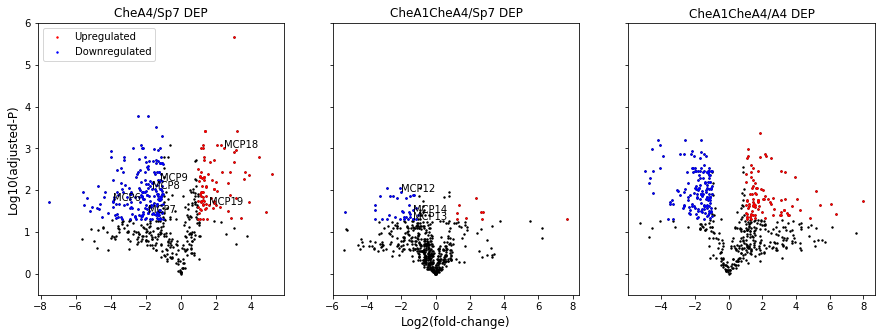

In [27]:
# Now, we want to visualize all of differentially expressed proteins for all comparision through a volcano plots
# First we need to combine all of the 
import matplotlib.pyplot as plt
import numpy as np
fig, ([ax1,ax2,ax3]) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,5))
plt.tight_layout

# For A4/sp7
index = list(data_cleaned.columns[11:20])
mean_sp7 = np.mean(data_cleaned[index[0:3]],axis=1).values
mean_A4 = np.mean(data_cleaned[index[3:6]],axis=1).values
log2_A4_sp7 = []
for index, value in enumerate(mean_sp7):
    log2_A4_sp7.append(np.log2(mean_A4[index]/value))

A4vssp7_pcorrect = A4vssp7_pcorrect.reset_index(drop=True)
p = list(A4vssp7_pcorrect['P-value A4 to sp7'])
#Upregulated genes
up_index = []
for i, value in enumerate(list(A4vssp7_pcorrect['log2(CheA4/sp7)'])):
    if value > 1 and -np.log10(p[i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(A4vssp7_pcorrect['log2(CheA4/sp7)'])):
    if value < -1  and -np.log10(p[i]) > -np.log10(0.05):
        down_index.append(i)

ax1.scatter(log2_A4_sp7,  -np.log10(qvs_A4vssp7[1]), color='k', s=2)
ax1.scatter([A4vssp7_pcorrect['log2(CheA4/sp7)'][i] for i in up_index], -np.log10([A4vssp7_pcorrect['P-value A4 to sp7'][i] for i in up_index]), color='r', s=2, label ='Upregulated')
ax1.scatter([A4vssp7_pcorrect['log2(CheA4/sp7)'][i] for i in down_index], -np.log10([A4vssp7_pcorrect['P-value A4 to sp7'][i] for i in down_index]), color='b', s=2, label='Downregulated')
ax1.set_title('CheA4/Sp7 DEP')
ax1.legend(loc='upper left')
ax1.set_ylabel('Log10(adjusted-P)', size=12) 
ax1.set_ylim([-0.5,6])
ax1.text(s='MCP6',x=-(3.8822596), y=-np.log10(0.017893))
ax1.text(s='MCP7',x=-(1.84582), y=-np.log10(0.0353039))
ax1.text(s='MCP8',x=-(1.65125), y=-np.log10(0.0092056))
ax1.text(s='MCP9',x=-(1.185), y=-np.log10(0.005821))
ax1.text(s='MCP18',x=2.45819, y=-np.log10(0.0009634))
ax1.text(s='MCP19',x=1.612, y=-np.log10(0.02233))

# For A1A4/sp7
index = list(data_cleaned.columns[11:20])
mean_sp7 = np.mean(data_cleaned[index[0:3]],axis=1).values
mean_A1A4 = np.mean(data_cleaned[index[6:9]],axis=1).values
log2_A1A4_sp7 = []
for index, value in enumerate(mean_sp7):
    log2_A1A4_sp7.append(np.log2(mean_A1A4[index]/value))

A1A4vssp7_pcorrect = A1A4vssp7_pcorrect.reset_index(drop=True)
p = list(A1A4vssp7_pcorrect['P-value A1A4 to sp7'])
#Upregulated genes
up_index = []
for i, value in enumerate(list(A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)'])):
    if value > 1 and -np.log10(p[i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)'])):
    if value < -1  and -np.log10(p[i]) > -np.log10(0.05):
        down_index.append(i)

ax2.scatter(log2_A1A4_sp7,  -np.log10(qvs_A1A4vssp7[1]), color='k', s=2)
ax2.scatter([A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)'][i] for i in up_index], -np.log10([A1A4vssp7_pcorrect['P-value A1A4 to sp7'][i] for i in up_index]), color='r', s=2)
ax2.scatter([A1A4vssp7_pcorrect['log2(CheA1CheA4/sp7)'][i] for i in down_index], -np.log10([A1A4vssp7_pcorrect['P-value A1A4 to sp7'][i] for i in down_index]), color='b', s=2)
ax2.set_title('CheA1CheA4/Sp7 DEP')
ax2.set_xlabel('Log2(fold-change)', size=12)
ax2.text(s='MCP12',x=-2.0375, y=-np.log10(0.01118))
ax2.text(s='MCP13',x=-1.3106, y=-np.log10(0.0497))
ax2.text(s='MCP14',x=-1.3226, y=-np.log10(0.034))

# For A1A4/A4
index = list(data_cleaned.columns[11:20])
mean_A4= np.mean(data_cleaned[index[3:6]],axis=1).values
mean_A1A4 = np.mean(data_cleaned[index[6:9]],axis=1).values
log2_A1A4_A4= []
for index, value in enumerate(mean_A4):
    log2_A1A4_A4.append(np.log2(mean_A1A4[index]/value))

A1A4vsA4_pcorrect = A1A4vsA4_pcorrect.reset_index(drop=True)
p = list(A1A4vsA4_pcorrect['P-value A1A4 to A4'])
#Upregulated genes
up_index = []
for i, value in enumerate(list(A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)'])):
    if value > 1 and -np.log10(p[i]) > -np.log10(0.05):
        up_index.append(i)
        
#Downregulated genes
down_index = []
for i, value in enumerate(list(A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)'])):
    if value < -1  and -np.log10(p[i]) > -np.log10(0.05):
        down_index.append(i)

ax3.scatter(log2_A1A4_A4,  -np.log10(qvs_A1A4vsA4[1]), color='k', s=2)
ax3.scatter([A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)'][i] for i in up_index], -np.log10([A1A4vsA4_pcorrect['P-value A1A4 to A4'][i] for i in up_index]), color='r', s=2)
ax3.scatter([A1A4vsA4_pcorrect['log2(CheA1CheA4/A4)'][i] for i in down_index], -np.log10([A1A4vsA4_pcorrect['P-value A1A4 to A4'][i] for i in down_index]), color='b', s=2)
ax3.set_title('CheA1CheA4/A4 DEP')


fig.savefig('Volcano_plot_A4VSA1A4VSSP7.svg', dpi=300)

In [28]:
# Analysis 2: Perform general comparitive analysis to see what proteins are in common for each comparision and how
# Many proteins are up and down regulated for each analysis

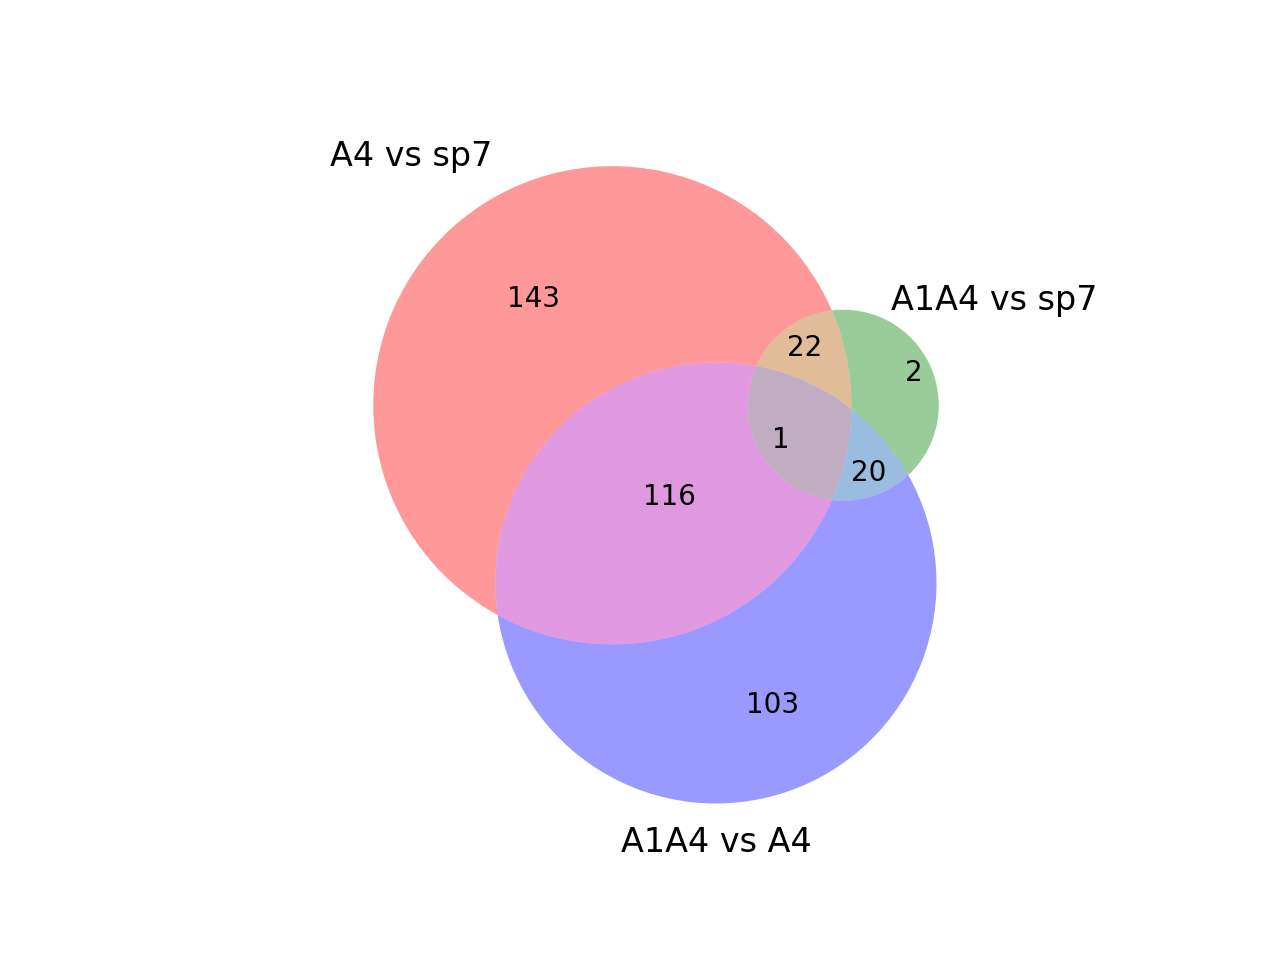

In [22]:
# For the venn diagram, there was a package that is required in python that is not present in the course server.
# So i have to do this analysis seperately on terminal 

from IPython.display import Image
Image(filename='venn_diagram_diffexpressed.png') 

In [23]:
#Now, we want to represent the number of up and down-regulated proteins for all comparasion to get an idea of the differentially expressed genes
# profiles for the comparasion

COLUMN_NAMES=['Down-regulated', 'Up-regulated']
df = pd.DataFrame(columns=COLUMN_NAMES)

#Now we have to figure out how many up and down-regulated genes are in each comparasion
count_up = 0
count_down = 0
for i in list(A4vssp7_pcorrect_diffexp['log2(CheA4/sp7)']):
    if i < 0:
        count_down += 1
    elif i > 0:
        count_up += 1

df = df.append({'Down-regulated': count_down, 'Up-regulated': count_up}, ignore_index=True)
count_up = 0
count_down = 0
for i in list(A1A4vssp7_pcorrect_diffexp['log2(CheA1CheA4/sp7)']):
    if i < 0:
        count_down += 1
    elif i > 0:
        count_up += 1
df = df.append({'Down-regulated': count_down, 'Up-regulated': count_up}, ignore_index=True)
count_up = 0
count_down = 0  
for i in list(A1A4vsA4_pcorrect_diffexp['log2(CheA1CheA4/A4)']):
    if i < 0:
        count_down += 1
    elif i > 0:
        count_up += 1
df = df.append({'Down-regulated': count_down, 'Up-regulated': count_up}, ignore_index=True)

df['Comparision']  = ['CheA4/sp7', 'CheA1CheA4/sp7' , 'CheA1CheA4/CheA4']
df= df.set_index('Comparision')
df

Down-regulated Up-regulated
Comparision                                 
CheA4/sp7                   200           82
CheA1CheA4/sp7               36            9
CheA1CheA4/CheA4            148           92

In [24]:
#Comment: Looking at the overall statistic of the DEP, there is about 400 differentially expressed protein found 
#among three different comparision. 200 is found to be down-regulated and 82 up-regulated in CheA4/sp7 comparision study
#.36 up-regulated and 9 down-regulated DEP are found in CheA1CheA4/Sp7 comparision. 148 up-regulated and 92 down-regulated DEP
#found in CheA1CheA4/CheA4 comparision. Within these DEP, there is one proteins found to be overlapping among these 
#three comparision. Most overlapped DEPs are found between CheA4/SP7 and CheA1CheA4/CheA4 comparisions (116 overlapping).

In [25]:
#Task 3: Now we want to look expression level of all the DEP for 3 comparisions to see the big pictures
#Also, we want clusters these DEP into groups as a data exploration method to probe out what mode expressions are
#available and what proteins participates for that mode of expressions

In [26]:
#Before we start the analysis, we want to combine all DEPs data files into one master data frame

#Combine all of the differentially expressed proteins from all pairwise comparasion
# and create a array matrix for the heatmap
index = ['Accession', 'Gene function','Abundances (Normalized): F7: Sample, Bio Rep1, SP7','Abundances (Normalized): F8: Sample, Bio Rep2, SP7',
       'Abundances (Normalized): F9: Sample, Bio Rep3, SP7',
       'Abundances (Normalized): F4: Sample, Bio Rep1, CheA4',
       'Abundances (Normalized): F5: Sample, Bio Rep2, CheA4',
       'Abundances (Normalized): F6: Sample, Bio Rep3, CheA4',
       'Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4',
       'Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4',
       'Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4']

diff_exp_A4vssp7_ann = A4vssp7_pcorrect_diffexp[index]
diff_exp_A1A4vssp7_ann = A1A4vssp7_pcorrect_diffexp[index]
diff_exp_A1A4vsA4_ann = A1A4vsA4_pcorrect_diffexp[index]

data_full = diff_exp_A4vssp7_ann.append(diff_exp_A1A4vssp7_ann)
data_full = data_full.append(diff_exp_A1A4vsA4_ann)

data_full = data_full.drop_duplicates(keep='first')
data_full = data_full.reset_index(drop=True)

#Now, we need to make this dataframe into an array so that the heatmap can be
#properly visualize 
#On the rows: Accession + Gene id + FUNCTION with log2(fold-change) for rep1,2,3
#On the columns: log2(CheA4/sp7)rep1,2,3,...

columns_name = ['row_name','CheA4/sp7 bio_rep 1','CheA4/sp7 bio_rep 2','CheA4/sp7 bio_rep 3', 'CheA1CheA4/sp7 bio_rep 1','CheA1CheA4/sp7 bio_rep 2','CheA1CheA4/sp7 bio_rep 3',
               'CheA1CheA4/CheA4 bio_rep 1','CheA1CheA4/CheA4 bio_rep 2','CheA1CheA4/CheA4 bio_rep 3']

row_names = []

acc = list(data_full['Accession'])
gene_func = list(data_full['Gene function'])

for index, value in enumerate(acc):
    string = value + ' ' + gene_func[index] 
    row_names.append(string)

import numpy
a = numpy.zeros(shape=(407,10))
heatmap_df = pd.DataFrame(a,columns=columns_name)

heatmap_df['row_name'] = row_names
heatmap_df.set_index('row_name', inplace=True)

#Allocating values to the heatmap dataframe
#A4 vs sp7
sp7_rep1 = list(data_full['Abundances (Normalized): F7: Sample, Bio Rep1, SP7'])
A4_rep1 = list(data_full['Abundances (Normalized): F4: Sample, Bio Rep1, CheA4'])
import numpy as np

sp7_A4_rep1 = []
for index, value in enumerate(sp7_rep1):
    sp7_A4_rep1.append(np.log2(A4_rep1[index]/value))


sp7_rep2 = list(data_full['Abundances (Normalized): F8: Sample, Bio Rep2, SP7'])
A4_rep2 = list(data_full['Abundances (Normalized): F5: Sample, Bio Rep2, CheA4'])
import numpy as np

sp7_A4_rep2 = []
for index, value in enumerate(sp7_rep2):
    sp7_A4_rep2.append(np.log2(A4_rep2[index]/value))
    
    

sp7_rep3 = list(data_full['Abundances (Normalized): F9: Sample, Bio Rep3, SP7'])
A4_rep3 = list(data_full['Abundances (Normalized): F6: Sample, Bio Rep3, CheA4'])
import numpy as np

sp7_A4_rep3 = []
for index, value in enumerate(sp7_rep3):
    sp7_A4_rep3.append(np.log2(A4_rep3[index]/value))


heatmap_df['CheA4/sp7 bio_rep 1'] = sp7_A4_rep1
heatmap_df['CheA4/sp7 bio_rep 2'] = sp7_A4_rep2
heatmap_df['CheA4/sp7 bio_rep 3'] = sp7_A4_rep3

#Allocating values to the heatmap dataframe
#A1A4 vs sp7
sp7_rep1 = list(data_full['Abundances (Normalized): F7: Sample, Bio Rep1, SP7'])
A1A4_rep1 = list(data_full['Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4'])
import numpy as np

sp7_A1A4_rep1 = []
for index, value in enumerate(sp7_rep1):
    sp7_A1A4_rep1.append(np.log2(A1A4_rep1[index]/value))


sp7_rep2 = list(data_full['Abundances (Normalized): F8: Sample, Bio Rep2, SP7'])
A1A4_rep2 = list(data_full['Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4'])
import numpy as np

sp7_A1A4_rep2 = []
for index, value in enumerate(sp7_rep2):
    sp7_A1A4_rep2.append(np.log2(A1A4_rep2[index]/value))
    
    

sp7_rep3 = list(data_full['Abundances (Normalized): F9: Sample, Bio Rep3, SP7'])
A1A4_rep3 = list(data_full['Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4'])
import numpy as np

sp7_A1A4_rep3 = []
for index, value in enumerate(sp7_rep3):
    sp7_A1A4_rep3.append(np.log2(A1A4_rep3[index]/value))

heatmap_df['CheA1CheA4/sp7 bio_rep 1'] = sp7_A1A4_rep1
heatmap_df['CheA1CheA4/sp7 bio_rep 2'] = sp7_A1A4_rep2
heatmap_df['CheA1CheA4/sp7 bio_rep 3'] = sp7_A1A4_rep3


#Allocating values to the heatmap dataframe
#A1A4 vs CheA4
A4_rep1 = list(data_full['Abundances (Normalized): F4: Sample, Bio Rep1, CheA4'])
A1A4_rep1 = list(data_full['Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4'])
import numpy as np

A1A4_A4_rep1 = []
for index, value in enumerate(A4_rep1):
    A1A4_A4_rep1.append(np.log2(A1A4_rep1[index]/value))


A4_rep2 = list(data_full['Abundances (Normalized): F5: Sample, Bio Rep2, CheA4'])
A1A4_rep2 = list(data_full['Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4'])
import numpy as np

A1A4_A4_rep2 = []
for index, value in enumerate(A4_rep2):
    A1A4_A4_rep2.append(np.log2(A1A4_rep2[index]/value))
    
    

A4_rep2 = list(data_full['Abundances (Normalized): F6: Sample, Bio Rep3, CheA4'])
A1A4_rep3 = list(data_full['Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4'])
import numpy as np

A1A4_A4_rep3 = []
for index, value in enumerate(A4_rep3):
    A1A4_A4_rep3.append(np.log2(A1A4_rep3[index]/value))

heatmap_df['CheA1CheA4/CheA4 bio_rep 1'] = A1A4_A4_rep1
heatmap_df['CheA1CheA4/CheA4 bio_rep 2'] = A1A4_A4_rep2
heatmap_df['CheA1CheA4/CheA4 bio_rep 3'] = A1A4_A4_rep3

In [27]:
heatmap_df.to_excel('heatmap_a4anda1a4only.xlsx')

In [28]:
## Now let's take a look at how the the data was clustered. Obviously, we don't want to represent the whole dataset
## to discover things (there over 300 DEP present) - so we want to split the cluster group for easier analysis, we can plot 
#heatmap for each cluster to discover some interesting pattern about our cells.

#There are many ways to determine the cluster, I determined 7 clusters from looking the clustered heatmap. I choose each cluster
# based on the pattern of changes for all three comparision. 
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 600
fig, ax = plt.subplots(1,1, figsize=(10,25))

distanceMatrix = pdist(heatmap_df)
mpl.rcParams['lines.linewidth'] = 0.3
hierarchy.set_link_color_palette(['r', 'k', 'b', 'purple', 'green', 'orange', 'brown'])
dend = dendrogram(linkage(distanceMatrix, method='ward'), 
           leaf_font_size=3,
                 labels = list(heatmap_df.index), orientation='left', ax=ax, color_threshold=22.5 )


(407,)


Text(277.527,0.5,'')

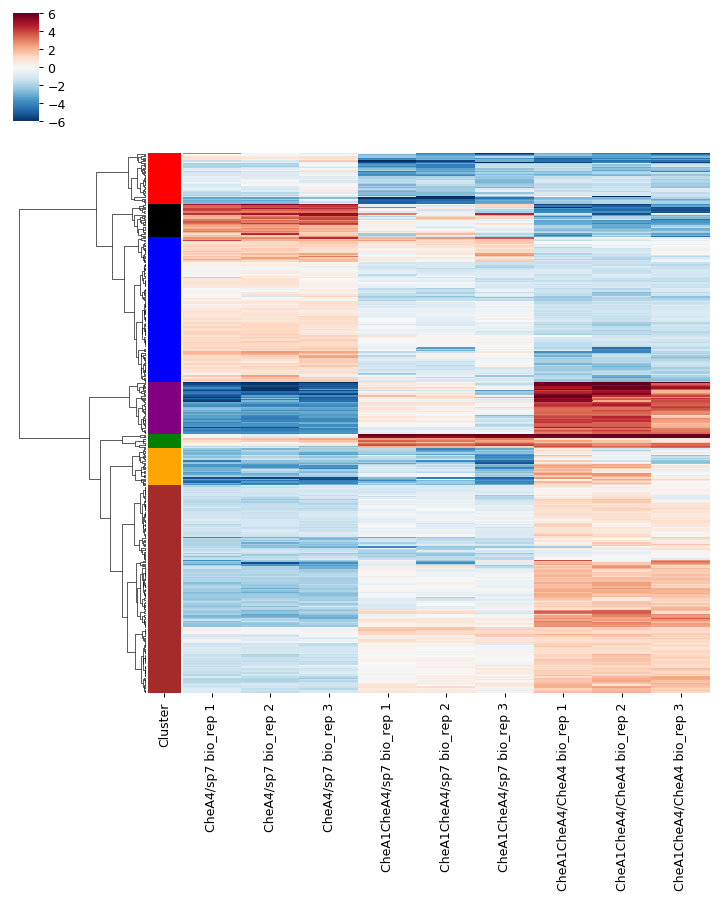

In [29]:
#Now we have our master dataframe, let's plot our heatmap + cluster to see what we got
from scipy.cluster.hierarchy import fcluster, linkage

import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 90

max_d = 22.5
clusters = fcluster(linkage(distanceMatrix, method='ward'), max_d, criterion='distance')
print(clusters.shape)
cls_pal = dict(zip(np.unique(clusters), sns.color_palette(['r', 'k', 'b', 'purple', 'green', 'orange', 'brown'])))
row_colors = pd.Series(clusters, index=heatmap_df.index, name='Cluster').map(cls_pal)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df, col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=False, row_colors=row_colors, vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(114.514,0.5,'')

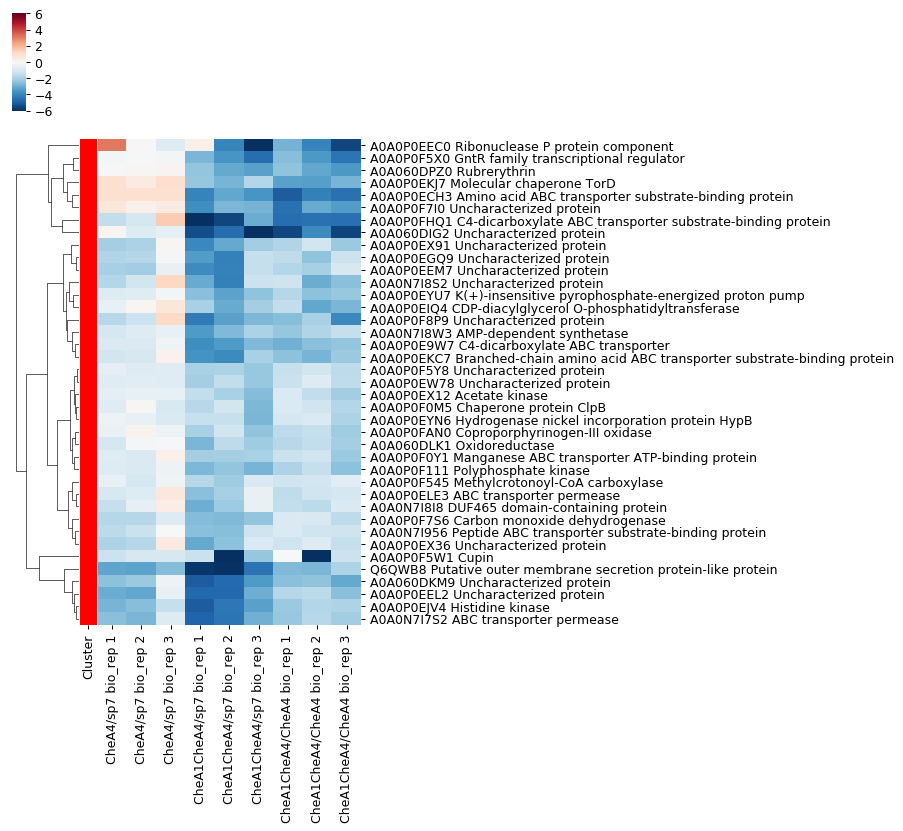

In [30]:
#Now that we clustered that values together, we can now visualized each cluster in heatmaps
heatmap_df_clustered = heatmap_df
heatmap_df_clustered['Cluster'] = list(clusters)

index = list(heatmap_df_clustered.columns[0:9])

#For Cluster #1 - red
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 1][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,9), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(114.514,0.5,'')

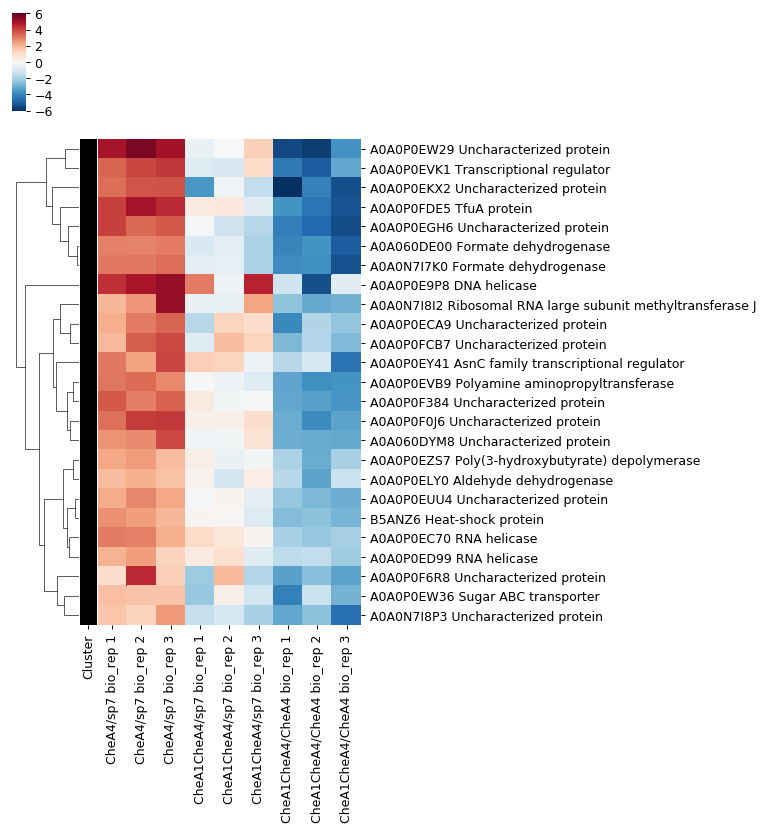

In [31]:
#For Cluster #2 - black
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 2][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,9), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(37.59,0.5,'')

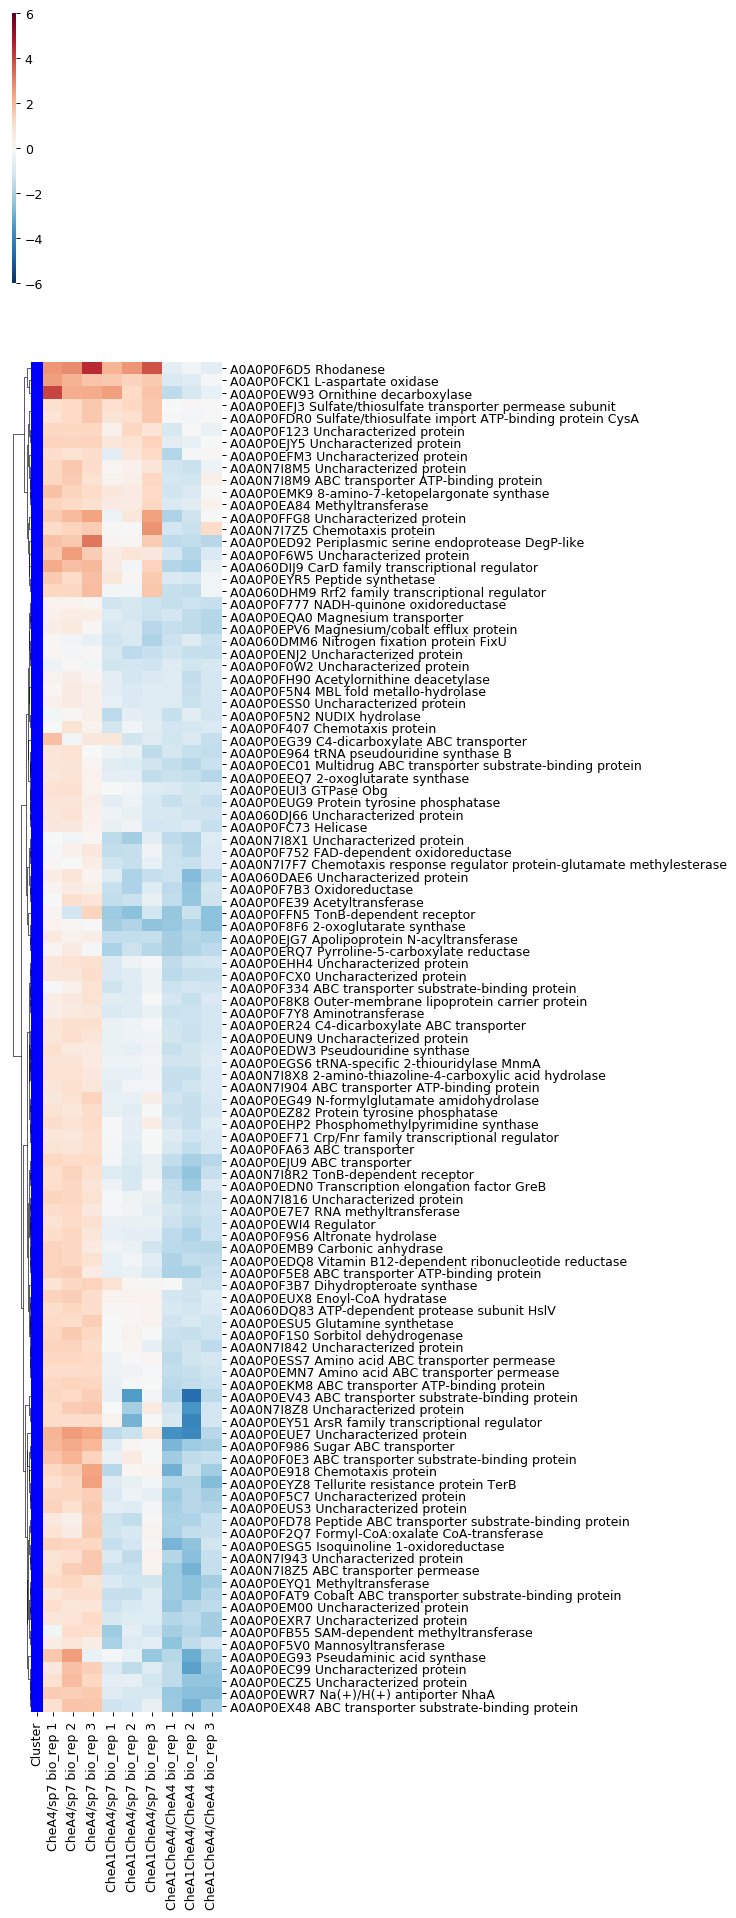

In [32]:
#For Cluster #3 - blue
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 3][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(3,25), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(114.514,0.5,'')

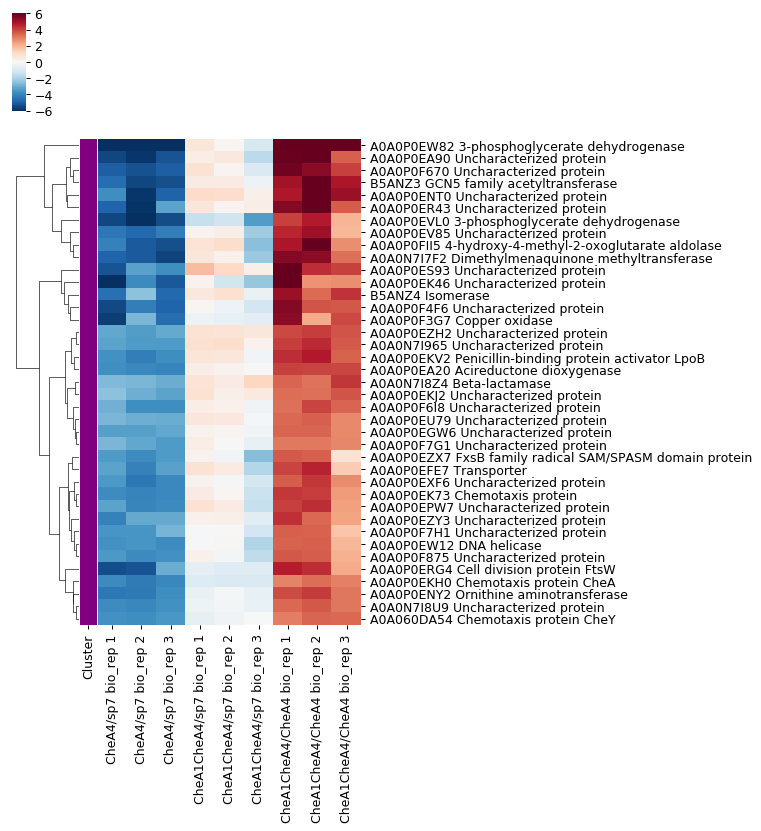

In [33]:
#For Cluster #4 - purple
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 4][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,9), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(114.514,0.5,'')

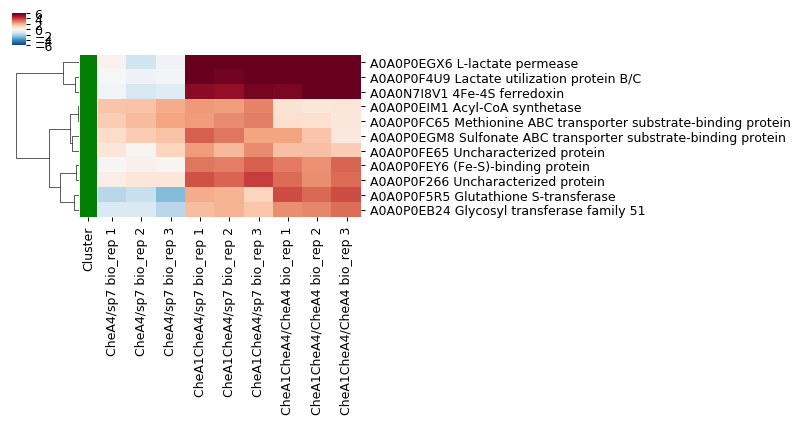

In [34]:
#For Cluster #5 - green
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 5][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,3), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(114.514,0.5,'')

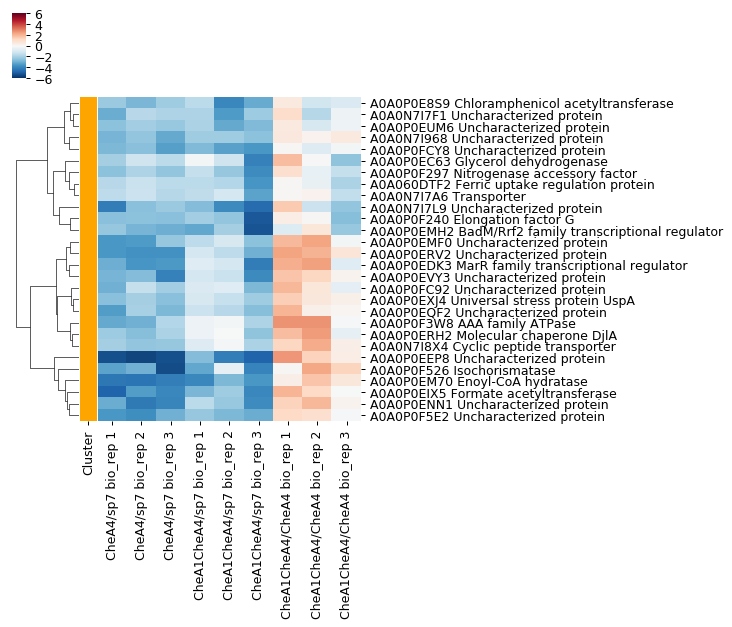

In [35]:
#For Cluster #6 - yelloq
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 6][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,6), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

Text(72.9805,0.5,'')

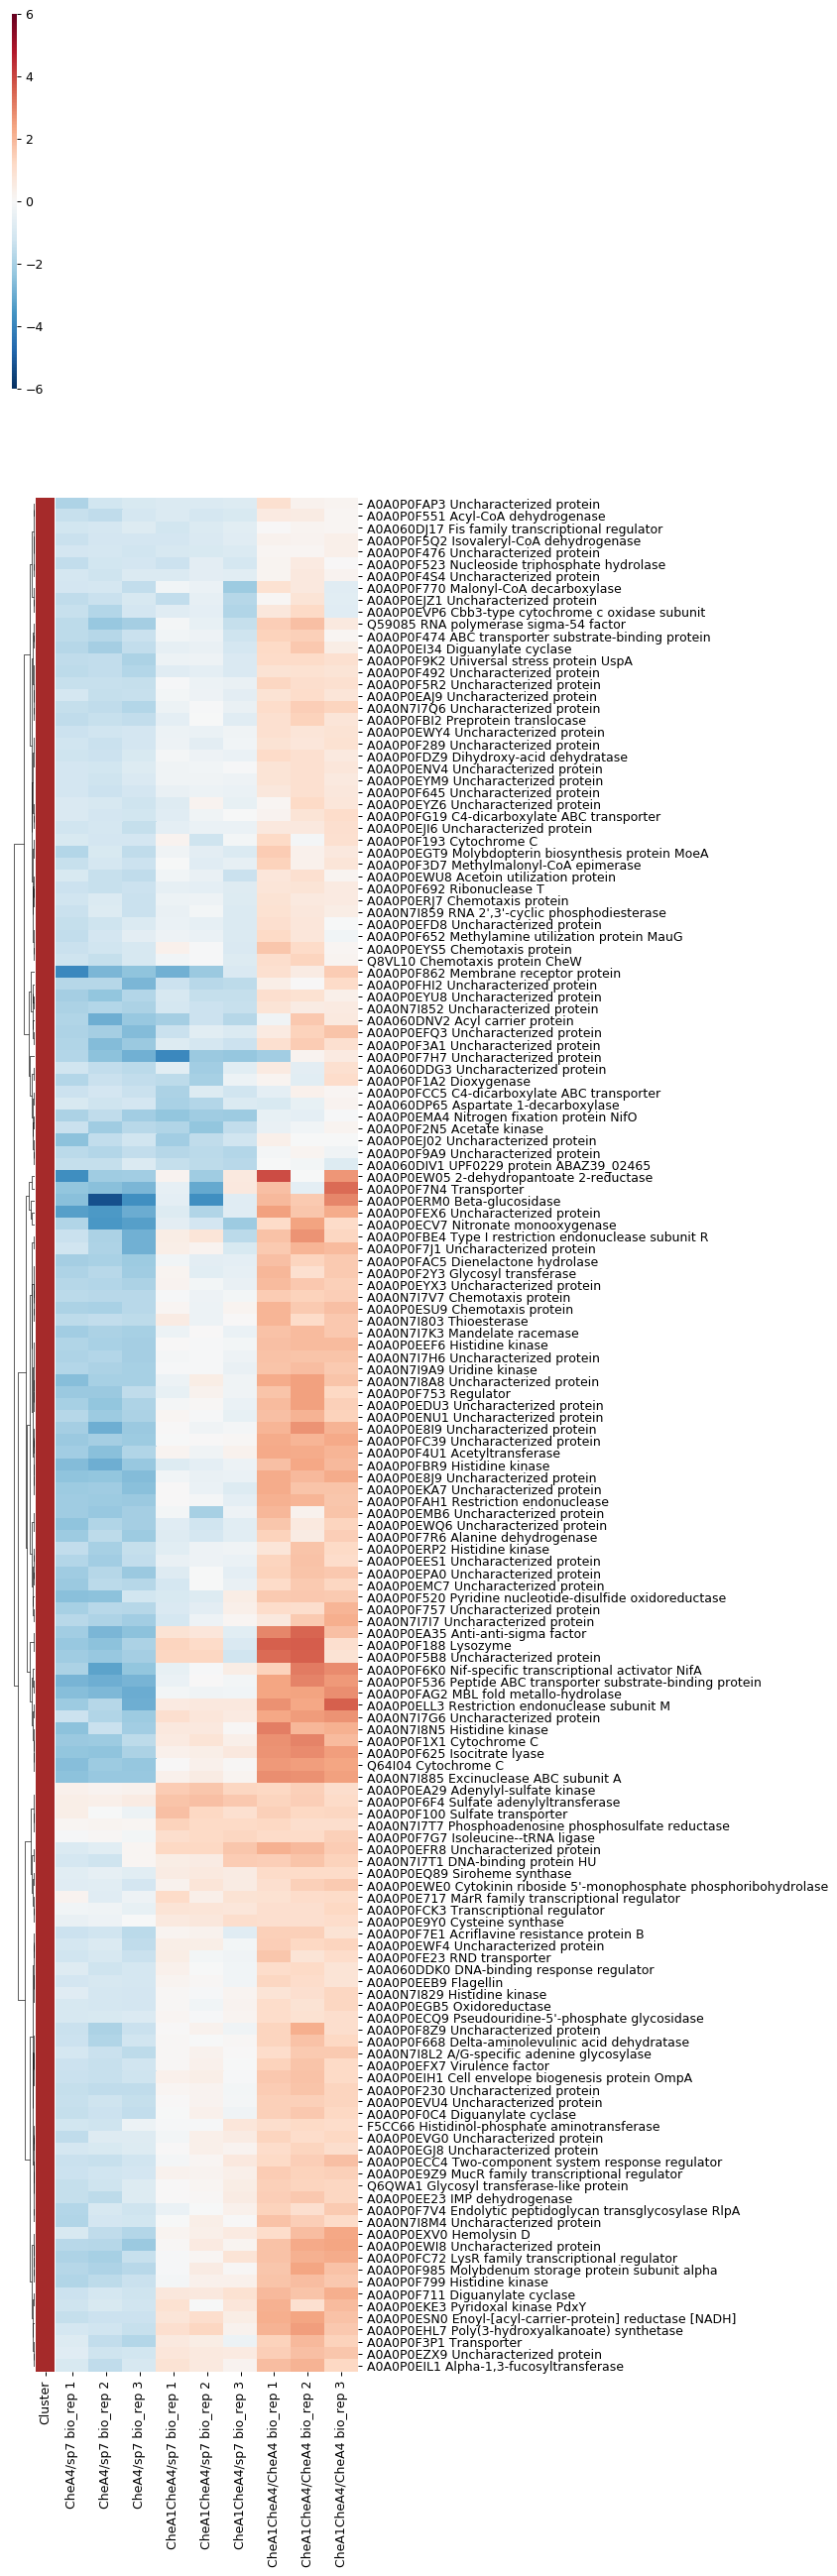

In [36]:
#For Cluster #7 - brown
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
g = sns.clustermap(heatmap_df_clustered[heatmap_df_clustered['Cluster'] == 7][index], col_cluster=False,
                   cmap='RdBu_r', method='ward', yticklabels=True, row_colors=row_colors, figsize=(5,35), vmin=-6, vmax=6)
ax = g.ax_heatmap
ax.set_ylabel('')

In [37]:
# Comment: From this heatmap analysis alone, we already find something interesting about our organism. Just to remind you,
# Azosprillum's chemotaxis pathway has a 4 different CheAs, and it is shown that CheA1 and CheA4 are important
# for chemotaxis. The activity of these histidine kinases is important for the ability for the cell's receptors
# to sense their foods organics compounds.

#Take a look at the heatmap at cluster number 2 (where A4/sp7 DEP is up-regulated). The CheA4 mutant show that some transporter
#for specific foods (ABS sugar transporter) are being up-regulated, while if you look at cluster number 4, some enzymes that
# are involved in organic compounds metabolisms is significantly de-regulated. From this observation, deleting A4 defects
#the cell's abundances in specific sugars metabolic enzymes, and they compensates for this changes by letting other 
# kind of sugars in. Why deleting A4 decreases metabolic enzymes is unknown, but one hypothesis is that since the cells
# cannot sense their food sources (thus have less food sources in the cells), the cell cannot turn on certain genes 
#via transcription factor.Furthermore, A4 mutants has decreased abundances in FTSW cell division protein. 
#The activity of FTSW requires alot of energy, and with less available/preferred foods,
#the cell conserves energy by not dividing much.

#What happens when both A1 and A4? By looking at DEP profile in cluster 1, a lot of transporter of amino acid,sugars, and 
# essential metals are being down-regulated. However, the cells with both A1 and A4 compensate for this by increasing
#protein abundance in lactate, methionine, and metabolic and permease proteins. Within the lactate metabolic pathway,
#lactate is converted acetate, then through acyl-coa synthetase (also up-regulated) convert acetate to acyl coa, which 
#is used for most metabolic pathways (proteins, DNA, ...). This is interesting because the cell are adjusting 
# their food sources depending on what signaling pathways are hindered.

#We cannot say anything more without further pathway analysis...

In [38]:
#Gene Set Enrichment Analysis: Now, our goal is that find out the functional categories of the DEPs for the down-regulation
#and up-regulation of 3 different comparision and see which function is prevalent in the down/up-regulation. 

#This is done by annotating the proteins with GO (gene ontology) and perform gene enrichment analysis. This is 
# not available within the python packages available. However, the gene enriched set can be extracted from
# an external program called blast2go. 

#Source: S. Götz et al. "High-throughput functional annotation and data mining with the Blast2GO suite",
#Nucleic Acids Research, Vol. 36, June, 2008, pp. 3420-3435.

#The gene enrichment analysis was already done beforehand, however, we can analyze these data using python

GO_enriched_A4vssp7_up = pd.read_table('GSEA_A4vsSP7DEP_up.txt')
GO_enriched_A4vssp7_down = pd.read_table('GSEA_A4vsSP7DEP_down.txt')
GO_enriched_A1A4vssp7_up = pd.read_table('GSEA_A1A4vsSP7DEP_up.txt')
GO_enriched_A1A4vssp7_down = pd.read_table('GSEA_A1A4vsSP7DEP_down.txt')
GO_enriched_A1A4vsA4_up = pd.read_table('GSEA_A1A4vsA4DEP_up.txt')
GO_enriched_A1A4vsA4_down = pd.read_table('GSEA_A1A4vsA4DEP_down.txt')

#Isolate only significant variables with p < 0.05
GO_enriched_A4vssp7_up = GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]
GO_enriched_A4vssp7_down = GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]

GO_enriched_A1A4vssp7_up = GO_enriched_A1A4vssp7_up[GO_enriched_A1A4vssp7_up['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]
GO_enriched_A1A4vssp7_down = GO_enriched_A1A4vssp7_down[GO_enriched_A1A4vssp7_down['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]

GO_enriched_A1A4vsA4_up = GO_enriched_A1A4vsA4_up[GO_enriched_A1A4vsA4_up['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]
GO_enriched_A1A4vsA4_down = GO_enriched_A1A4vsA4_down[GO_enriched_A1A4vsA4_down['P-Value'] < 0.05][['GO ID', 'GO Name', 'GO Category', 'P-Value']]

#GO_enriched_A1A4vsA4_down

Text(0.5,0.98,'CheA4/SP7 Top 30 Biological Process GO enrichment')

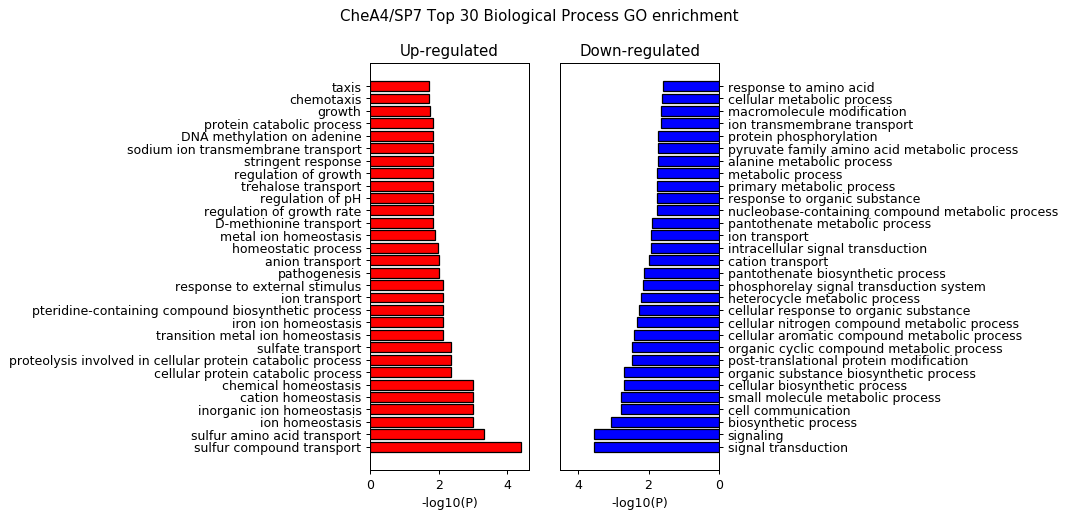

In [39]:
#Plot BP and MF, we could look at Cellular Component - but for our study, it is not applicable
#Here, we want to plot the bar graph of top 30 GO term for BP and M

# A4 vs SP7 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([4.5, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA4/SP7 Top 30 Biological Process GO enrichment')

Text(0.5,0.98,'CheA4/SP7 Top 30 Molecular Function GO enrichment')

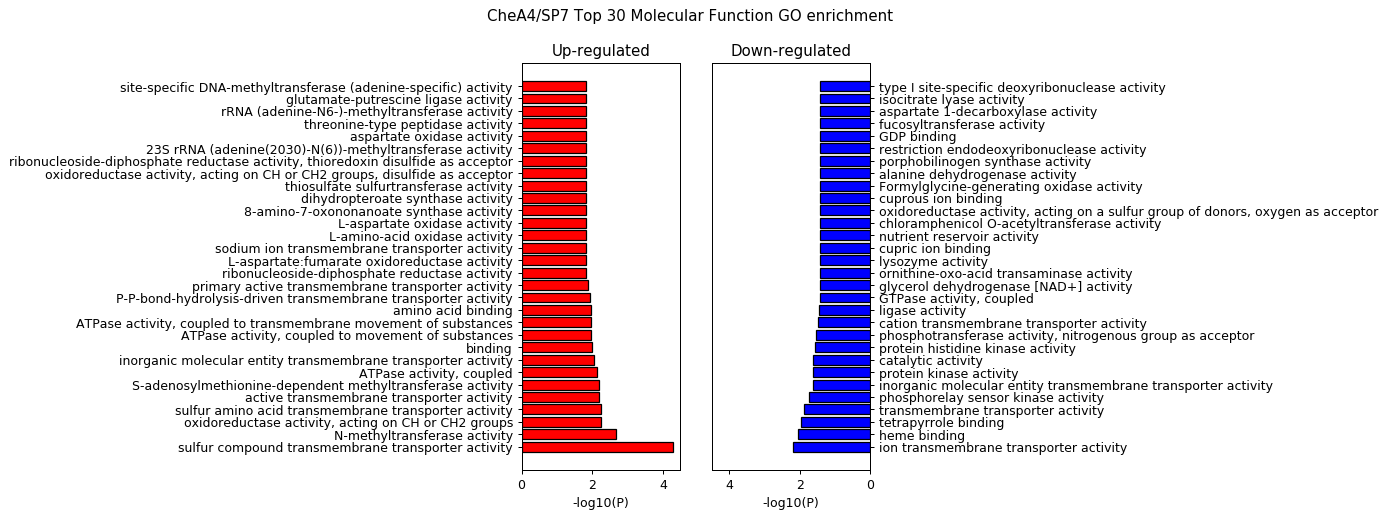

In [40]:
#Molecular function A4/SP7

# A4 vs SP7 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A4vssp7_up[GO_enriched_A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A4vssp7_down[GO_enriched_A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([4.5, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA4/SP7 Top 30 Molecular Function GO enrichment')

Text(0.5,0.98,'CheA1CheA4/SP7 Top Biological Process GO enrichment')

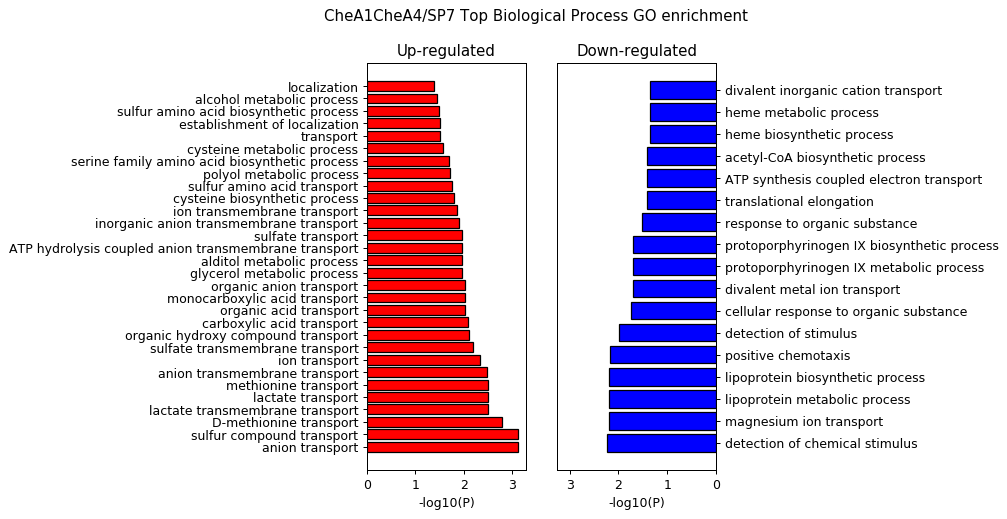

In [41]:
#Plot BP and MF, we could look at Cellular Component - but for our study, it is not applicable
#Here, we want to plot the bar graph of top 30 GO term for BP and M

# A1A4 vs SP7 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A1A4vssp7_up[GO_enriched_A1A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A1A4vssp7_up[GO_enriched_A1A4vssp7_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A1A4vssp7_down[GO_enriched_A1A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A1A4vssp7_down[GO_enriched_A1A4vssp7_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')

#Down regulated only have 17
index_graph = list(range(0,17))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([3.25, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA1CheA4/SP7 Top Biological Process GO enrichment')

Text(0.5,0.98,'CheA1CheA4/SP7 Top Molecular Function GO enrichment')

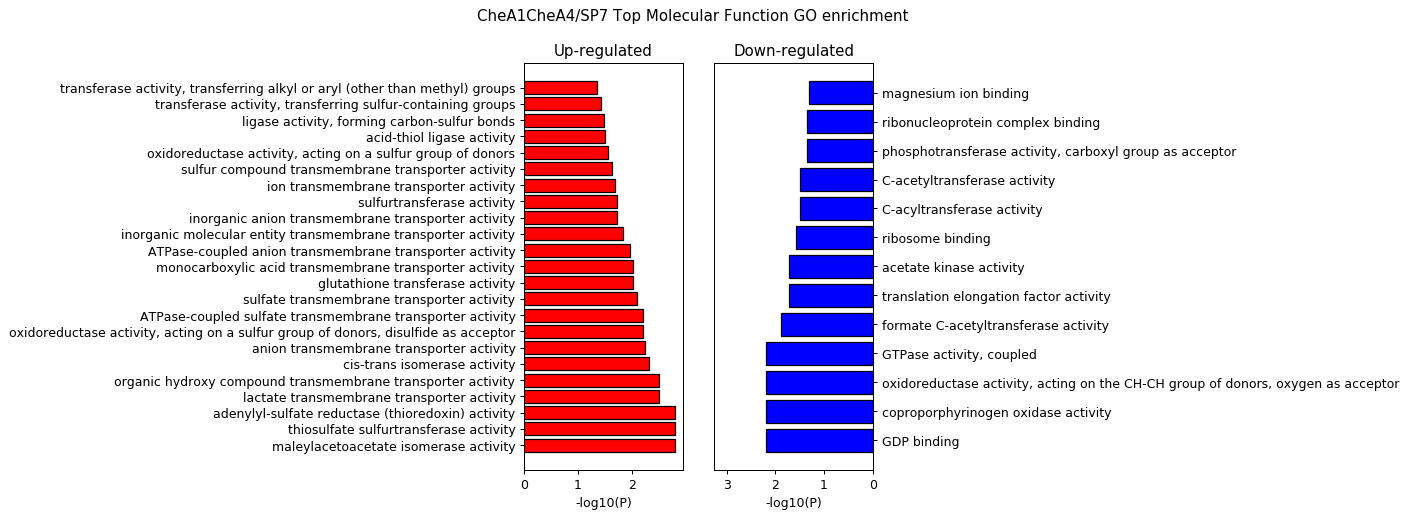

In [42]:
#Plot BP and MF, we could look at Cellular Component - but for our study, it is not applicable
#Here, we want to plot the bar graph of top 30 GO term for BP and M

# A1A4 vs SP7 up-regulated MF

index_graph = list(range(0,23))

BP_p_up = list(GO_enriched_A1A4vssp7_up[GO_enriched_A1A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A1A4vssp7_up[GO_enriched_A1A4vssp7_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A1A4vssp7_down[GO_enriched_A1A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A1A4vssp7_down[GO_enriched_A1A4vssp7_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')

#Down regulated only have 23
index_graph = list(range(0,13))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([3.25, 0])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA1CheA4/SP7 Top Molecular Function GO enrichment')

Text(0.5,0.98,'CheA1CheA4/CheA4 Top 30 Biological Process GO enrichment')

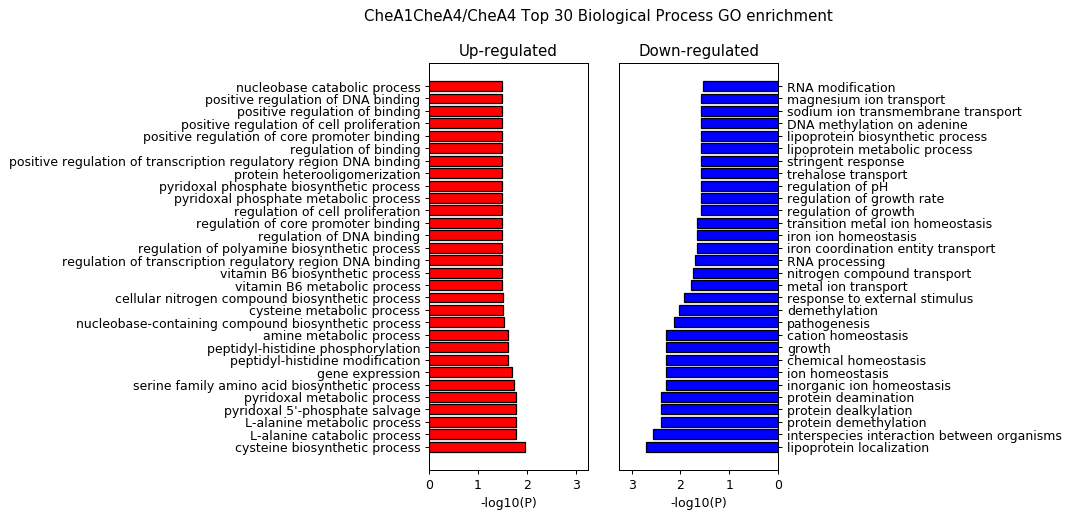

In [43]:
# A1A4 vs A4 up-regulated BP

index_graph = list(range(0,30))

BP_p_up = list(GO_enriched_A1A4vsA4_up[GO_enriched_A1A4vsA4_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A1A4vsA4_up[GO_enriched_A1A4vsA4_up['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A1A4vsA4_down[GO_enriched_A1A4vsA4_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A1A4vsA4_down[GO_enriched_A1A4vsA4_down['GO Category'] == 'BIOLOGICAL_PROCESS'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')

graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([3.25, 0])
ax1.set_xlim([0, 3.25])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA1CheA4/CheA4 Top 30 Biological Process GO enrichment')

Text(0.5,0.98,'CheA1CheA4/CheA4 Top Molecular Function GO enrichment')

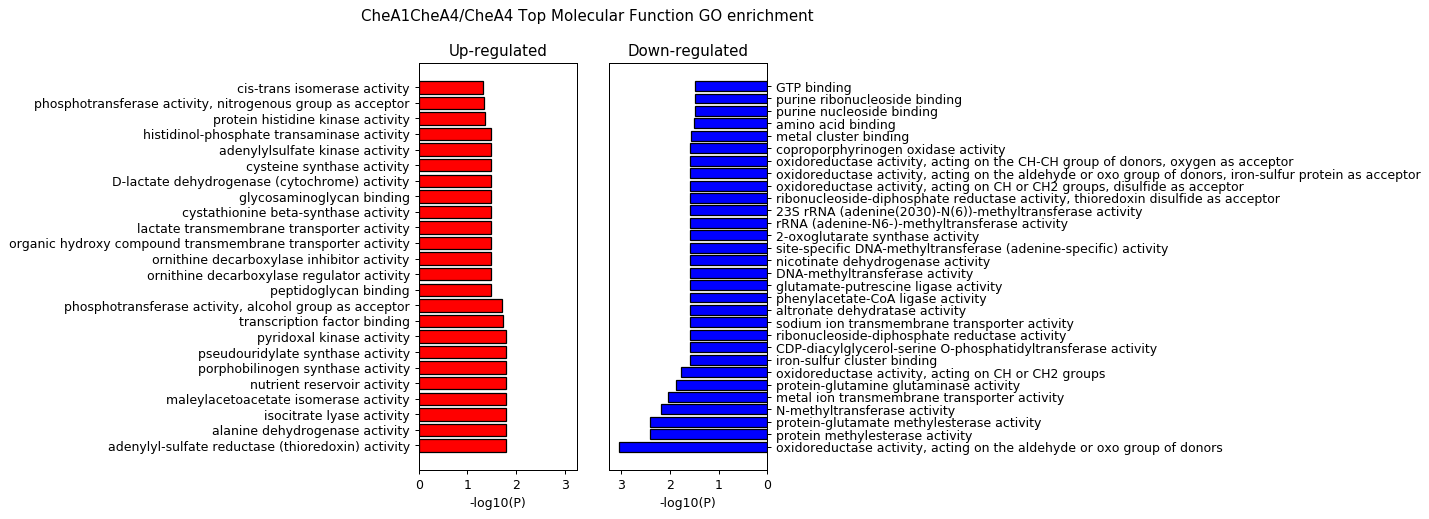

In [44]:
# A1A4 vs A4 up-regulated MF

index_graph = list(range(0,24))

BP_p_up = list(GO_enriched_A1A4vsA4_up[GO_enriched_A1A4vsA4_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_up =list(GO_enriched_A1A4vsA4_up[GO_enriched_A1A4vsA4_up['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

BP_p_down=list(GO_enriched_A1A4vsA4_down[GO_enriched_A1A4vsA4_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['P-Value'])
BP_id_down=list(GO_enriched_A1A4vsA4_down[GO_enriched_A1A4vsA4_down['GO Category'] == 'MOLECULAR_FUNCTION'].sort_values('P-Value')['GO Name'])

import matplotlib.pyplot as plt
import numpy as np

fig, ([ax1, ax2]) = plt.subplots(nrows=1, ncols=2, figsize=(5,6))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_up[i]))
    
ax1.barh([BP_id_up[i] for i in index_graph], graph_bp_p, color = 'red', align='center', edgecolor='k')
ax1.set_title('Up-regulated')
ax1.set_xlabel('-log10(P)')
# A1A4 vs A4 down-regulated MF
index_graph = list(range(0,30))
graph_bp_p = []
for i in index_graph:
    graph_bp_p.append(-np.log10(BP_p_down[i]))
ax2.barh([BP_id_down[i] for i in index_graph], graph_bp_p, color = 'blue', align='center', edgecolor='k')
ax2.invert_xaxis()
ax2.yaxis.tick_right()
ax2.set_title('Down-regulated')
ax2.set_xlim([3.25, 0])
ax1.set_xlim([0, 3.25])
ax2.set_xlabel('-log10(P)')
fig.suptitle('CheA1CheA4/CheA4 Top Molecular Function GO enrichment')

In [45]:
#Comment: 

#Azosprillium brasilense exhibit two type of taxis: metabolism-independent taxis (chemotaxis) and metabolism-dependent
#taxis (energytaxis). The one that we are interested in right now is energy-taxis (because the data shows some interesting
#thing about it). Energytaxis involves temporal interaction between the electron transport systems, and the taxis is often
#coupled with energy-related pathway. The substrate required for sensing is usually metabolizable amino acids, and cell can
#detect this stimulus as long as the right receptors are there within the membrane. It is agreed upon that a functional
#electron transport systems and receptors that are able to sense redox changes are required to a functional 
#energy taxis systems. For a general scheme for energy transducer systems in Azo, take a look at the figure below. 

#There are many hypothesis can be made from this analysis, however, I'm going to go into one hypothesis.
#According to our analysis of our proteomics data, deletion of major histidine kinases affect the energy taxis pathway, as
# evident from the de-regulation of proteins that has molecular function of heme binding and ion transport (H+ transport).
#Furthermore, deleting CheA4 results into increased regulation of methionine transport activity. Methionine metabolism 
# within Azosprillium converts methionine into SAM (S-adenyl-methionine). SAM is further used in the chemoreceptor 
# methylation process through a chemotatic protein called CheR. In addition to that, our GO annotation of the moelcular
#function shows increased methyl-transferase activity. The dynamics between methylation and de-methylation pattern within
#chemotaxis control the sensitivities of the chemoreceptor, and the imbalance of this dynamic will cause the receptor
# to lose substrate sensitivity in term of a gradient. My observation is that deleting CheA4 results in the hindering of
# the energy-taxis pathway as a result of the dysfunctionality of heme-binding chemoreceptor through increasing methylation
# (lessen chemoreceptor sensitivity). Within the analysis, it is not shown the regulation pattern of chemoreceptor, suggesting
# that the chemoreceptor are not being degraded. 

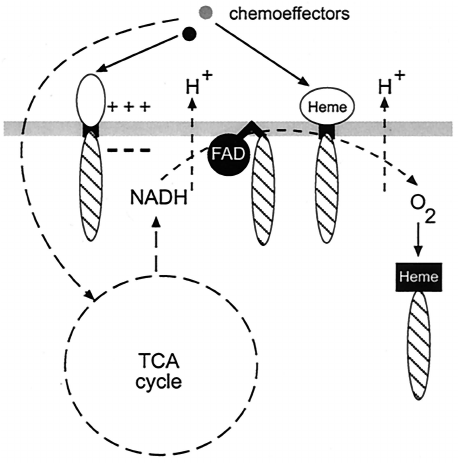

In [46]:
#Image from 

#Alexandre, Gladys & Zhulin, Igor. (2001). More Than One Way To Sense Chemicals. 
#Journal of bacteriology. 183. 4681-6. 10.1128/JB.183.16.4681-4686.2001. 

from IPython.display import Image
Image(filename='fig1.png') 


In [47]:
#Task 4: Check replicability of these studies: Now that we have perform all of the analysis we can. We want to check the
#credibility of the data itself - Is the replicates consistent? Is the data normal (as it is a requirement for statistical analysis)?
# Adding this analysis will show to our audiences that our data is credible.

#In order to do this task, we will need to see how each replicates correlates with each other within each comparision studies
# and look at the distribution of the log fold changes for each replicates within each comparision study.

#We will plot log fold changes of replicate 1 vs replicate 2, replicate 2 vs replicate 3,etc and perform Pearson's correlation
#test to see whether the two replicates follows a linear model. If the result shows a good Pearson's correlation coefficient
# R^2 > 0.6 - then, we can conclude that the study is reproducible.

#To see where each replicates are normal, we want to plot the histogram of the log fold change of all replicates within
#each comparision to see if the distribution is normal. If they are normal, it means that the stastical test we perform
# earlier is valid. 

/Users/lvo5/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


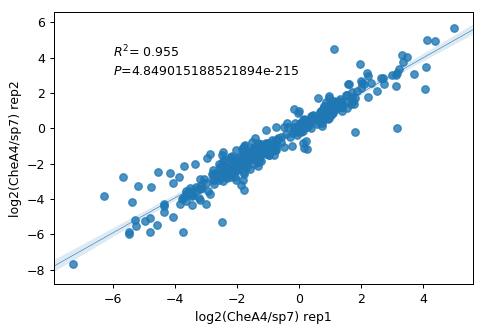

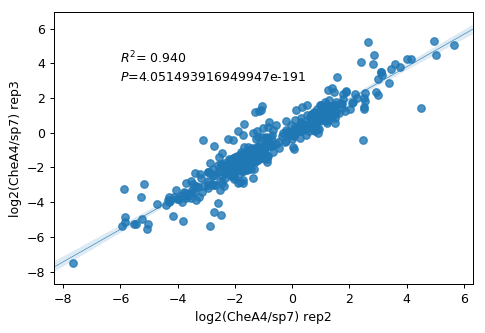

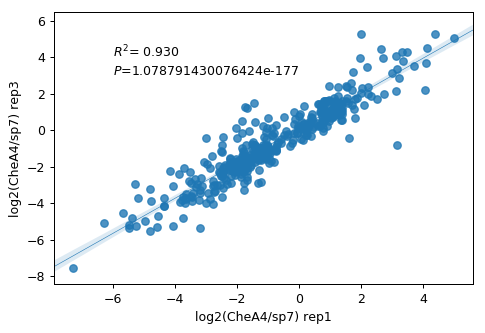

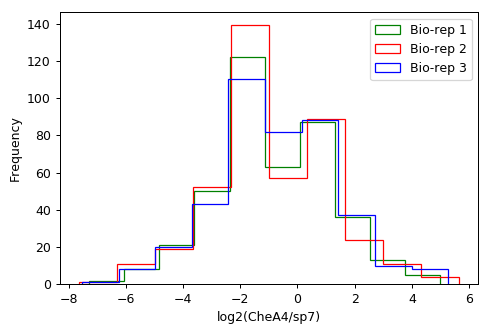

In [47]:
#A4/sp7 all replicates histogram and bar chart
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scp
from matplotlib.pyplot import savefig
data = data_full
log2change_rep1 = list(np.log2(data['Abundances (Normalized): F4: Sample, Bio Rep1, CheA4'].values/data['Abundances (Normalized): F7: Sample, Bio Rep1, SP7'].values))
log2change_rep2 = list(np.log2(data['Abundances (Normalized): F5: Sample, Bio Rep2, CheA4'].values/data['Abundances (Normalized): F8: Sample, Bio Rep2, SP7'].values))
log2change_rep3 = list(np.log2(data['Abundances (Normalized): F6: Sample, Bio Rep3, CheA4'].values/data['Abundances (Normalized): F9: Sample, Bio Rep3, SP7'].values))

#Pearson correlation - first value is the r^2 value, and the second is the pvalue

A= scp.pearsonr(log2change_rep1, log2change_rep2)
B= scp.pearsonr(log2change_rep2, log2change_rep3)
C = scp.pearsonr(log2change_rep1, log2change_rep3)
      
fig, ax1 = plt.subplots(1, 1)
ax1= sns.regplot(log2change_rep1, log2change_rep2)
ax1.set(xlabel = 'log2(CheA4/sp7) rep1', ylabel='log2(CheA4/sp7) rep2')
string1 = '$R^2$=' + str("%6.3f" % A[0])
string2 = '$P$=' + str( A[1])
ax1.text(x=-6,y=4, s= string1)
ax1.text(x=-6,y=3, s= string2)
fig.savefig('A4_sp7_regression_rep1vsrep2.svg', dpi=300)

fig, ax2 = plt.subplots(1, 1)
ax2 = sns.regplot(log2change_rep2, log2change_rep3)
ax2.set(xlabel = 'log2(CheA4/sp7) rep2', ylabel='log2(CheA4/sp7) rep3')
string1 = '$R^2$=' + str("%6.3f" % B[0])
string2 = '$P$=' + str( B[1])
ax2.text(x=-6,y=4, s= string1)
ax2.text(x=-6,y=3, s= string2)
fig.savefig('A4_sp7_regression_rep2vsrep3.svg', dpi=300)

fig, ax3 = plt.subplots(1, 1)
ax3 = sns.regplot(log2change_rep1, log2change_rep3)
ax3.set(xlabel = 'log2(CheA4/sp7) rep1', ylabel='log2(CheA4/sp7) rep3')
string1 = '$R^2$=' + str("%6.3f" % C[0])
string2 = '$P$=' + str( C[1])
ax3.text(x=-6,y=4, s= string1)
ax3.text(x=-6,y=3, s= string2)
fig.savefig('A4_sp7_regression_rep1vsrep3.svg', dpi=300)

#histogram
fig, ax4 = plt.subplots(1, 1)
ax4 = plt.hist(log2change_rep1, alpha=1,  edgecolor = 'green', histtype='step')
ax4 = plt.hist(log2change_rep2, alpha=1, edgecolor = 'red',histtype='step')
ax4 = plt.hist(log2change_rep3, alpha=1, edgecolor = 'blue',histtype='step')
plt.xlabel('log2(CheA4/sp7)')
plt.ylabel('Frequency')
plt.legend(['Bio-rep 1', 'Bio-rep 2', 'Bio-rep 3'])
fig.savefig('A4_sp7_frequency.svg', dpi=300)

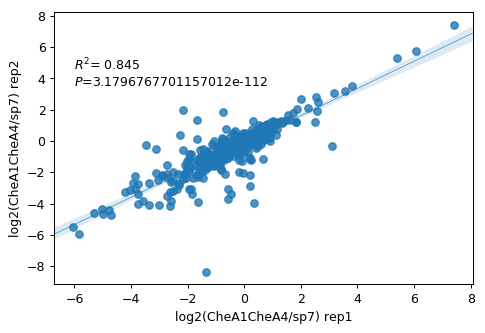

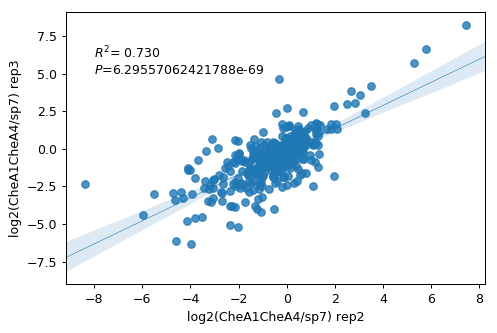

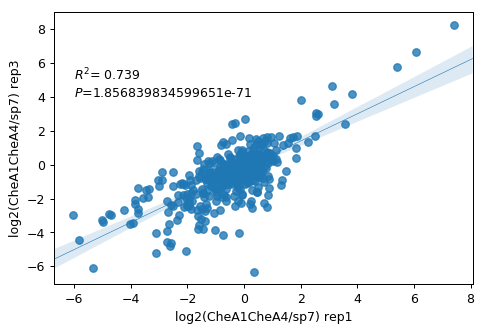

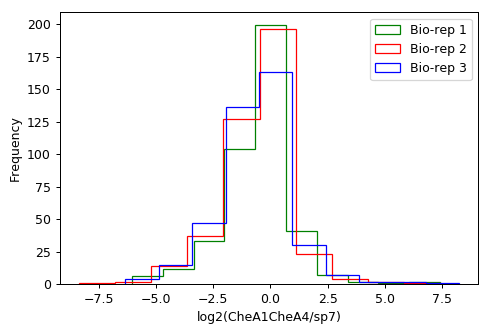

In [52]:
#A1A4/sp7 all replicates histogram and bar chart
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scp
log2change_rep1 = list(np.log2(data['Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4'].values/data['Abundances (Normalized): F7: Sample, Bio Rep1, SP7'].values))
log2change_rep2 = list(np.log2(data['Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4'].values/data['Abundances (Normalized): F8: Sample, Bio Rep2, SP7'].values))
log2change_rep3 = list(np.log2(data['Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4'].values/data['Abundances (Normalized): F9: Sample, Bio Rep3, SP7'].values))

#Pearson correlation - first value is the r^2 value, and the second is the pvalue

A= scp.pearsonr(log2change_rep1, log2change_rep2)
B= scp.pearsonr(log2change_rep2, log2change_rep3)
C = scp.pearsonr(log2change_rep1, log2change_rep3)
      
fig, ax1 = plt.subplots(1, 1)
ax1= sns.regplot(log2change_rep1, log2change_rep2)
ax1.set(xlabel = 'log2(CheA1CheA4/sp7) rep1', ylabel='log2(CheA1CheA4/sp7) rep2')
string1 = '$R^2$=' + str("%6.3f" % A[0])
string2 = '$P$=' + str( A[1])
ax1.text(x=-6,y=4.5, s= string1)
ax1.text(x=-6,y=3.5, s= string2)
fig.savefig('a1a4vssp7_rep1vsrep2.svg', dpi=300)


fig, ax2 = plt.subplots(1, 1)
ax2 = sns.regplot(log2change_rep2, log2change_rep3)
ax2.set(xlabel = 'log2(CheA1CheA4/sp7) rep2', ylabel='log2(CheA1CheA4/sp7) rep3')
string1 = '$R^2$=' + str("%6.3f" % B[0])
string2 = '$P$=' + str( B[1])
ax2.text(x=-8,y=6, s= string1)
ax2.text(x=-8,y=5, s= string2)
fig = ax2.get_figure()
fig.savefig('a1a4vssp7_rep2vsrep3.svg', dpi=300)


fig, ax3 = plt.subplots(1, 1)
ax3 = sns.regplot(log2change_rep1, log2change_rep3)
ax3.set(xlabel = 'log2(CheA1CheA4/sp7) rep1', ylabel='log2(CheA1CheA4/sp7) rep3')
string1 = '$R^2$=' + str("%6.3f" % C[0])
string2 = '$P$=' + str( C[1])
ax3.text(x=-6,y=5, s= string1)
ax3.text(x=-6,y=4, s= string2)
fig = ax3.get_figure()
fig.savefig('a1a4vssp7_rep1vsrep3.svg', dpi=300)


#histogram
fig, ax4 = plt.subplots(1, 1)
ax4 = plt.hist(log2change_rep1, alpha=1,  edgecolor = 'green', histtype='step')
ax4 = plt.hist(log2change_rep2, alpha=1, edgecolor = 'red',histtype='step')
ax4 = plt.hist(log2change_rep3, alpha=1, edgecolor = 'blue',histtype='step')
plt.xlabel('log2(CheA1CheA4/sp7)')
plt.ylabel('Frequency')
plt.legend(['Bio-rep 1', 'Bio-rep 2', 'Bio-rep 3'])


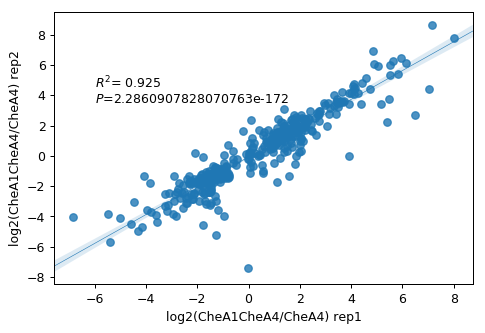

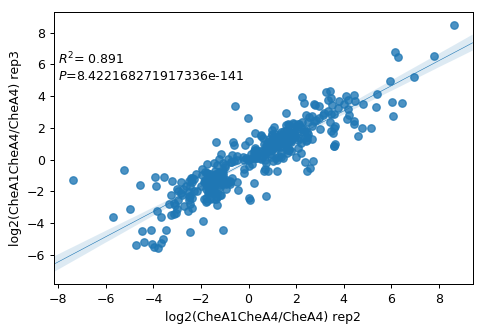

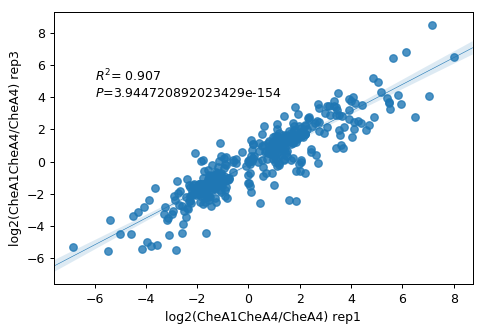

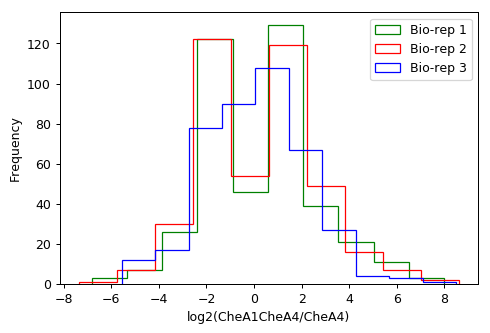

In [53]:
#A1A4/A4 all replicates histogram and bar chart
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scp
log2change_rep1 = list(np.log2(data['Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4'].values/data['Abundances (Normalized): F4: Sample, Bio Rep1, CheA4'].values))
log2change_rep2 = list(np.log2(data['Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4'].values/data['Abundances (Normalized): F5: Sample, Bio Rep2, CheA4'].values))
log2change_rep3 = list(np.log2(data['Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4'].values/data['Abundances (Normalized): F6: Sample, Bio Rep3, CheA4'].values))

#Pearson correlation - first value is the r^2 value, and the second is the pvalue

A= scp.pearsonr(log2change_rep1, log2change_rep2)
B= scp.pearsonr(log2change_rep2, log2change_rep3)
C = scp.pearsonr(log2change_rep1, log2change_rep3)
      
fig, ax1 = plt.subplots(1, 1)
ax1= sns.regplot(log2change_rep1, log2change_rep2)
ax1.set(xlabel = 'log2(CheA1CheA4/CheA4) rep1', ylabel='log2(CheA1CheA4/CheA4) rep2')
string1 = '$R^2$=' + str("%6.3f" % A[0])
string2 = '$P$=' + str( A[1])
ax1.text(x=-6,y=4.5, s= string1)
ax1.text(x=-6,y=3.5, s= string2)
plt.savefig('a1a4vsA4_rep1vsrep2.svg', dpi = 300)


fig, ax2 = plt.subplots(1, 1)
ax2 = sns.regplot(log2change_rep2, log2change_rep3)
ax2.set(xlabel = 'log2(CheA1CheA4/CheA4) rep2', ylabel='log2(CheA1CheA4/CheA4) rep3')
string1 = '$R^2$=' + str("%6.3f" % B[0])
string2 = '$P$=' + str( B[1])
ax2.text(x=-8,y=6, s= string1)
ax2.text(x=-8,y=5, s= string2)
plt.savefig('a1a4vsA4_rep2vsrep3.svg', dpi = 300)

fig, ax3 = plt.subplots(1, 1)
ax3 = sns.regplot(log2change_rep1, log2change_rep3)
ax3.set(xlabel = 'log2(CheA1CheA4/CheA4) rep1', ylabel='log2(CheA1CheA4/CheA4) rep3')
string1 = '$R^2$=' + str("%6.3f" % C[0])
string2 = '$P$=' + str( C[1])
ax3.text(x=-6,y=5, s= string1)
ax3.text(x=-6,y=4, s= string2)
plt.savefig('a1a4vsA4_rep3vsrep1.svg', dpi = 300)

#histogram
fig, ax4 = plt.subplots(1, 1)
ax4 = plt.hist(log2change_rep1, alpha=1,  edgecolor = 'green', histtype='step')
ax4 = plt.hist(log2change_rep2, alpha=1, edgecolor = 'red',histtype='step')
ax4 = plt.hist(log2change_rep3, alpha=1, edgecolor = 'blue',histtype='step')
plt.xlabel('log2(CheA1CheA4/CheA4)')
plt.ylabel('Frequency')
plt.legend(['Bio-rep 1', 'Bio-rep 2', 'Bio-rep 3'])
fig.savefig('a1a4vsa4_hist.svg', dpi=300)

In [51]:
# Comment: According to our analysis here, it seems like our studies are fairly reproducible. The A4/SP7 comparision log
#fold change distribution shows normal distribution, as well as A1A4/Sp7 and A1A4/A4 studies. This suggests that our
#statistical results are valid, as a normal distribution is implied within a t-test. For all 3 studies, the Pearson's
#correlation coefficent ranges between 0.66 - 0.955. This suggests that at least 66% of our data point can be explained
# by the linear regression model, which points out that the data gather within this study are reproducible. 